<a href="https://colab.research.google.com/github/Apoov123/Cardiovascular-Risk-Prediction-Classification/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project title - Cardiovascular Risk Prediction**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**

# Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

# Behavioral:

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

# Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

# Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

#Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Importing Modules**

In [304]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree
from sklearn import ensemble
from collections import Counter

%matplotlib inline

In [305]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
# Loading the datasst
df = pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv", encoding = "ISO-8859-1")

In [307]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [308]:
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [310]:
df.describe(include='all')

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000



* we can observe that the dataframe contains 3390 rows and 17 variables with some missing values.
* Lets have a look into the data. 
* It contains some categorical and numerical variables, lets just have a look into the value counts of all categorical data.

In [311]:
# Value counts of the categorical and numerical features 
for i in df.columns:
  print({i:df[i].nunique()})

{'id': 3390}
{'age': 39}
{'education': 4}
{'sex': 2}
{'is_smoking': 2}
{'cigsPerDay': 32}
{'BPMeds': 2}
{'prevalentStroke': 2}
{'prevalentHyp': 2}
{'diabetes': 2}
{'totChol': 240}
{'sysBP': 226}
{'diaBP': 142}
{'BMI': 1259}
{'heartRate': 68}
{'glucose': 132}
{'TenYearCHD': 2}


Now, we can see that how many categories and how many unique values are present in categorical variables and numerical variables. So for further study, we are defining two lists as categorical and numerical variables.

In [312]:
#defining numeric and categorical column to treat null values based on that
categorical_columns = ['education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']

Here age,CigsPerDay,totChol,sysBP,diaBP,heartrate and glucose are discrete numerical variables

In [313]:
#checking the categories in each categorical column
for i in categorical_columns:
  if i!='cigsPerDay':
    print(i,df[i].value_counts().reset_index(),"\n")

education    index  education
0    1.0       1391
1    2.0        990
2    3.0        549
3    4.0        373 

sex   index   sex
0     F  1923
1     M  1467 

is_smoking   index  is_smoking
0    NO        1703
1   YES        1687 

BPMeds    index  BPMeds
0    0.0    3246
1    1.0     100 

prevalentStroke    index  prevalentStroke
0      0             3368
1      1               22 

prevalentHyp    index  prevalentHyp
0      0          2321
1      1          1069 

diabetes    index  diabetes
0      0      3303
1      1        87 

TenYearCHD    index  TenYearCHD
0      0        2879
1      1         511 



Here, TenYearCHD is the dependent variable and we can observe that only 16% (511/3390) of the total dataset is in '1' class, remaining 2879/3390 are in '0' class. We may face some difficulty in building model regarding this.

# Exploratory data Analysis

**Treating Null and Missing values**

In [314]:
# Checking null values of data 
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

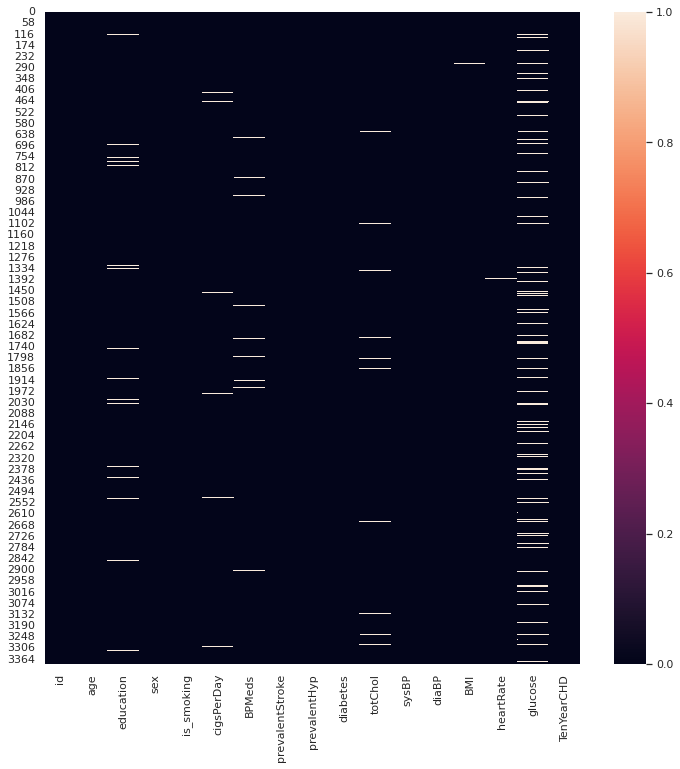

In [315]:
# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [316]:
df.dropna(inplace=True)

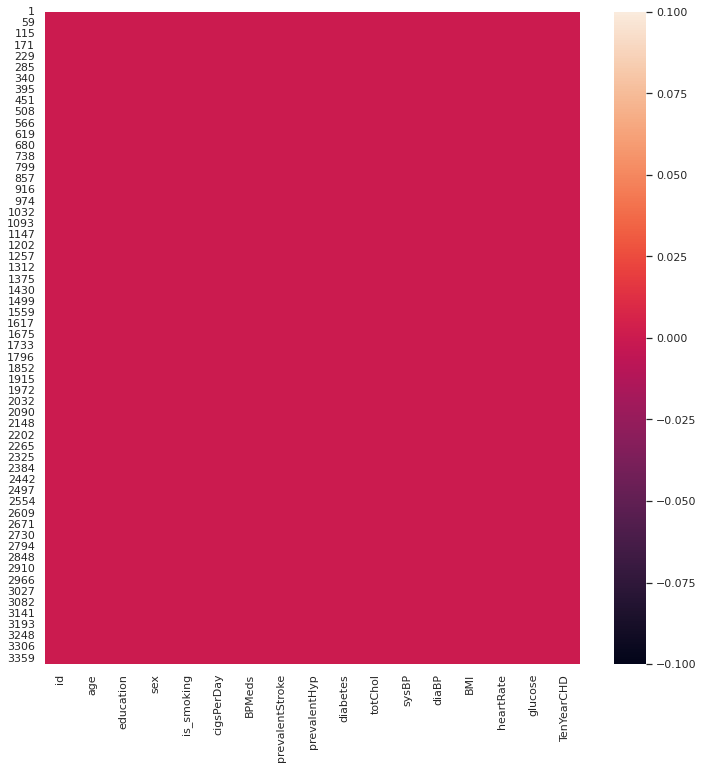

In [317]:
# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

Here, we can observe that 7 variables are having missing values. And 'glucose' is the variable with 9% of missing data. We will deal with the missing values once we are done with the EDA.

 **Treating  the outliers.**

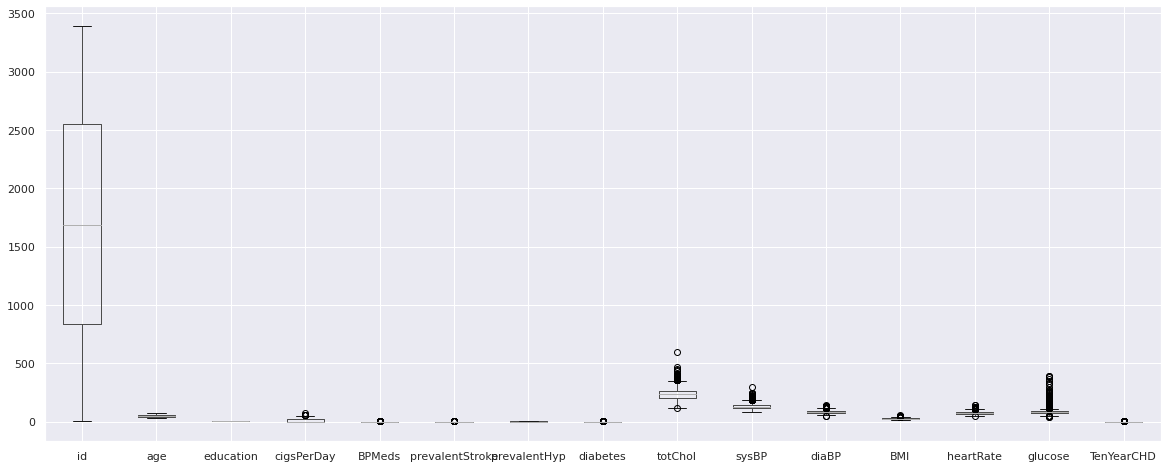

In [318]:
plt.figure(figsize=(20,8))
df.boxplot()

There are outliers but within the possible range of values.

Let's check the correlation between each feature.

**Correlation check**

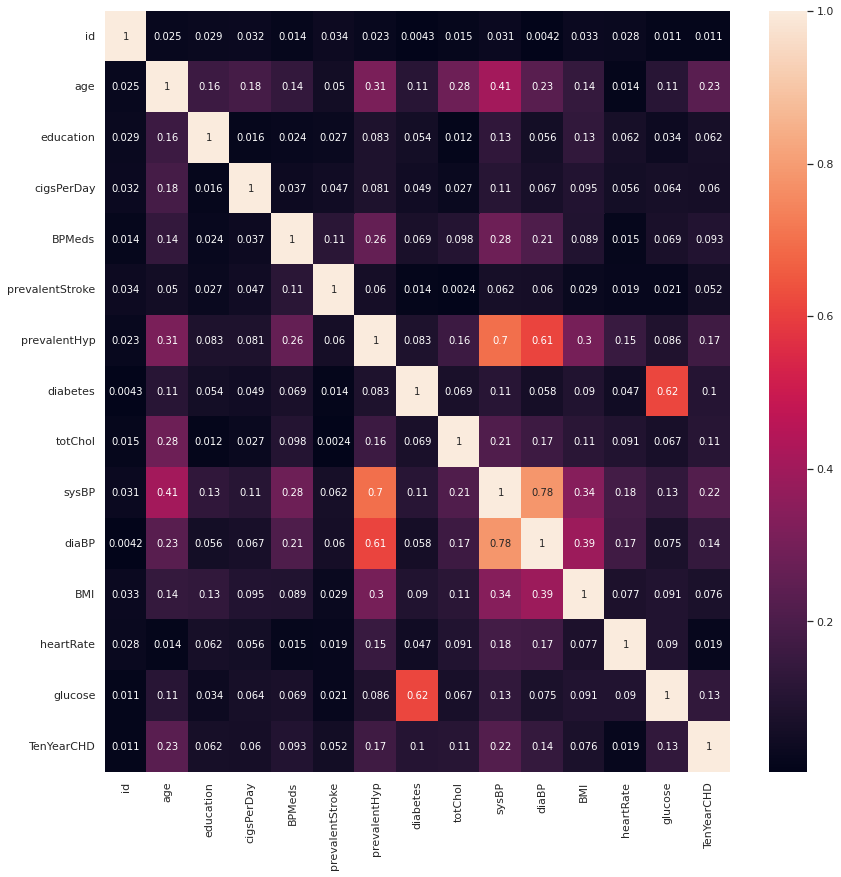

In [319]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)

There is no significant correlation between independent and dependant variables but there is a high correlation within independent variables.

# Understanding the distribution of features

**Analysing the data through pie charts**

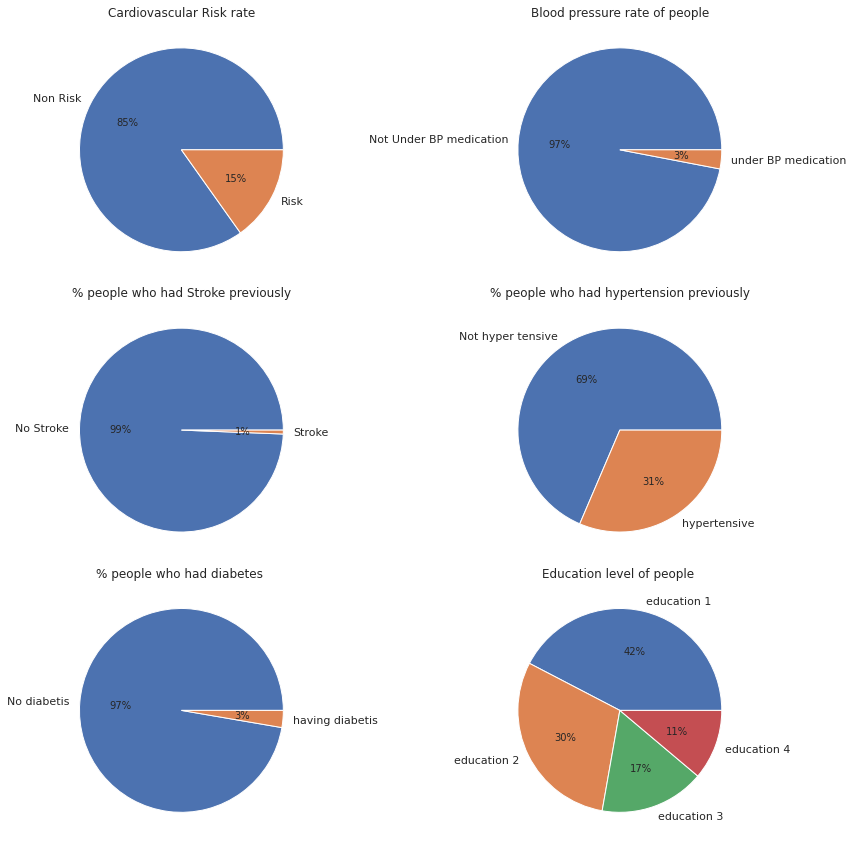

In [320]:
fig, ax = plt.subplots(figsize = (15, 15))

plt.subplot(3,2,1)
labels = 'Non Risk',"Risk"
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Cardiovascular Risk rate")

plt.subplot(3,2,2)
labels = 'Not Under BP medication',"under BP medication"
plt.pie(df['BPMeds'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Blood pressure rate of people")

plt.subplot(3,2,3)
labels = 'No Stroke','Stroke'
plt.pie(df['prevalentStroke'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had Stroke previously")

plt.subplot(3,2,4)
labels = 'Not hyper tensive','hypertensive'
plt.pie(df['prevalentHyp'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had hypertension previously")

plt.subplot(3,2,5)
labels = 'No diabetis','having diabetis'
plt.pie(df['diabetes'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had diabetes ")

plt.subplot(3,2,6)
labels = 'education 1','education 2','education 3','education 4'
plt.pie(df['education'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Education level of people ")

plt.subplots_adjust(hspace= 0.1, wspace= 0.1)
plt.show()

**Now, we can conclude that,**

(1) There are 85% of people are actually not at risk of Cardio Vascular Risk.

(2) There are only 3% of people who are under BP medication.

(3) There are only 1% of people who had stroke previously.

(4) There are 32% of people who are having Hyper Tension.

(5) There are 97% of the people who are non diabetic.

(6) There are 11%(least) of the people are having highest level education and 42%(highest) of the people are having basic education level.

# Numerical Data Analysis

**Bar plot for al the numerical variables along with dependent variable**

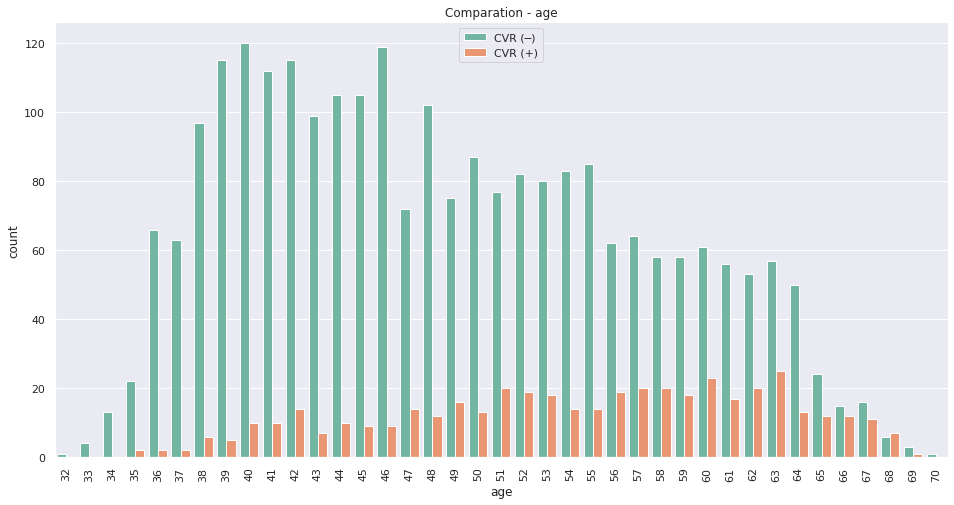

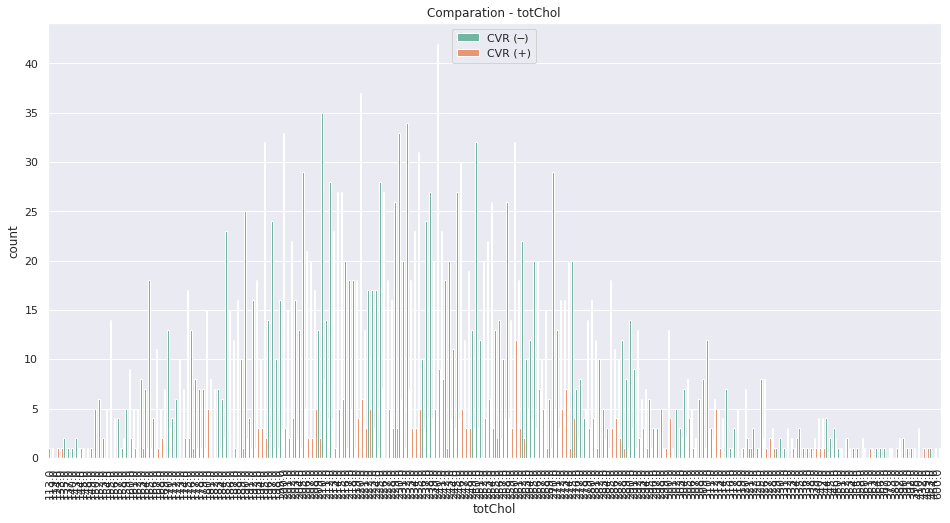

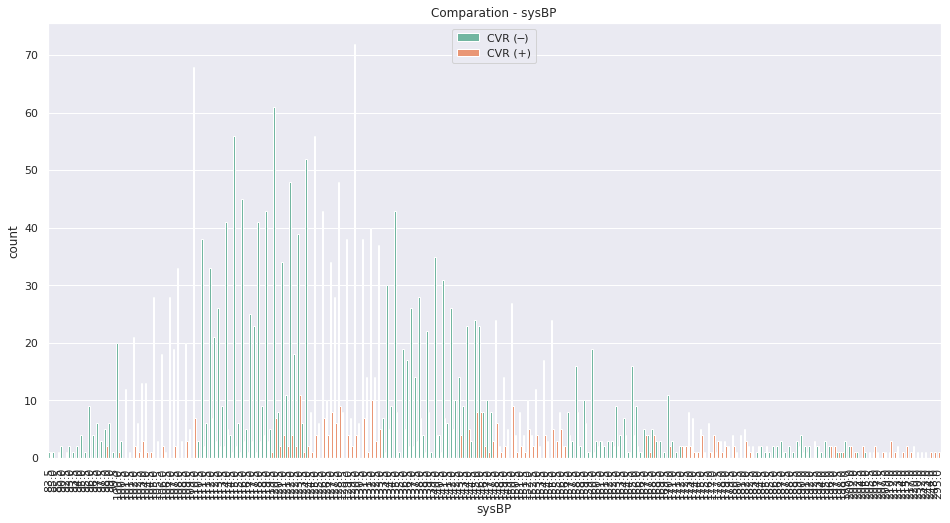

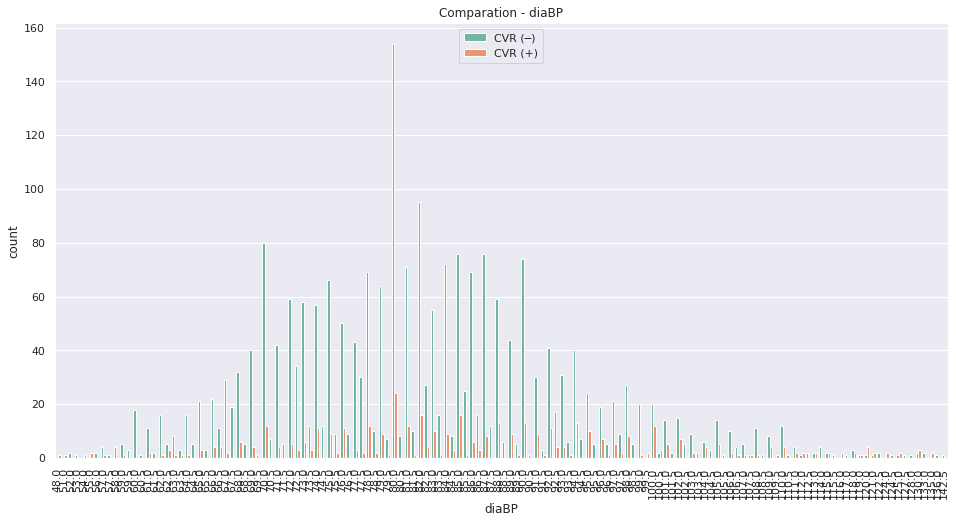

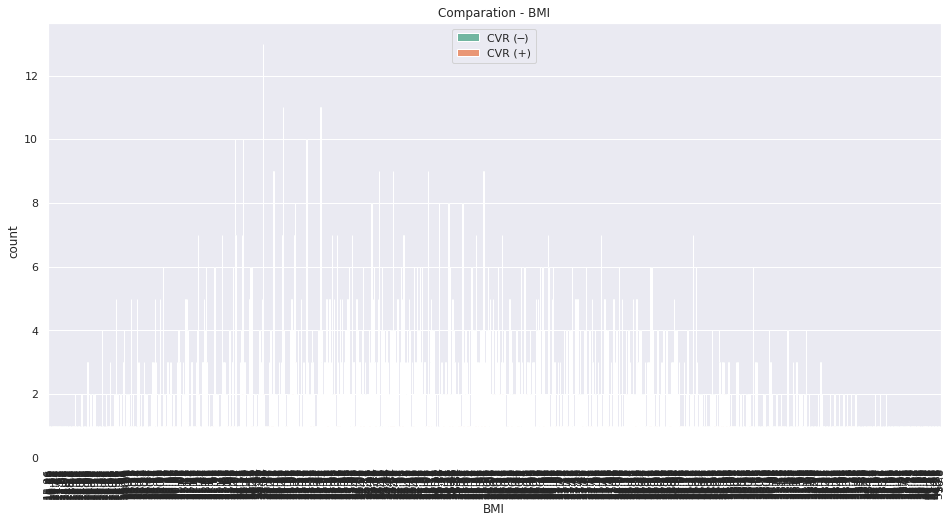

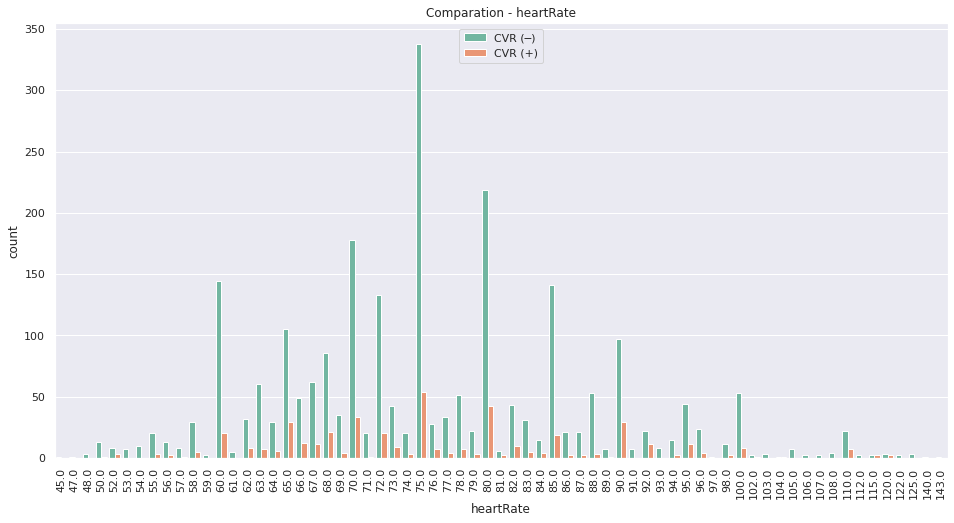

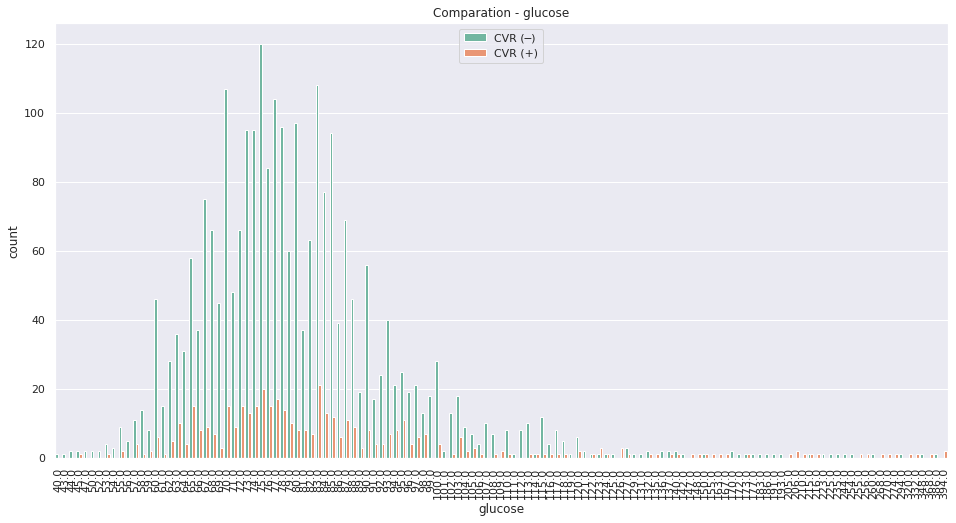

In [321]:
from matplotlib import rcParams

def NumPlot(df, col):
    # rcParams['figure.figsize'] = 11, 8
    plt.figure(figsize=(16,8))
    plt.xticks(rotation=90)
    sns.countplot(x=col, hue='TenYearCHD', data = df, palette="Set2")
    plt.title('Comparation - {}'.format(col))
    plt.legend(['CVR (─)', 'CVR (+)'])

for i in numerical_columns:
  NumPlot(df,i)

**Here, we tried plotting all numerical varables with the dependent variables. From here we can conclude that,**

(1) The major people who are having Cardio Vasclar Risk(CVR) are at the age of 50-70.

(2) The cholestrol level of people is same for both kind of people who are at risk of CVR and not at risk of CVR. Instead fewer people who are not at risk of CVR are having high Cholestrol level.

(3) If we consider sysBP and diaBP together into consideration, then most of the people are having normal BP. So its hard to conclude to here about the CVR.

(4) Even though many people are having normal range of BMI, but the people whoevever are having high BMI, they are at risk of CVR.

(5) Many people are having normal heartrate range, so its not appropriate to come into conclusion about the CVR at this stage.

(6) In glucose level, we can see some outliers in both kind of people(whoa are at risk and not at risk). But the people who got high glucose level are coming into the category of CVR. So we can conclude that its even one of the factor which may contribute to CVR.

# Analysing the categorical features

**A)-UNIVARIATE ANALYSIS**

**Which gender is prone to coronary heart disease?**

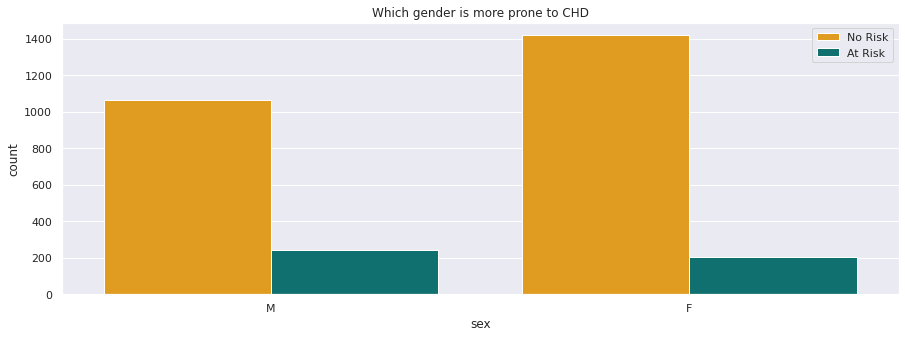

In [322]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (15,5))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

 **Are diabetic patients at more risk of coronary heart disease ??**

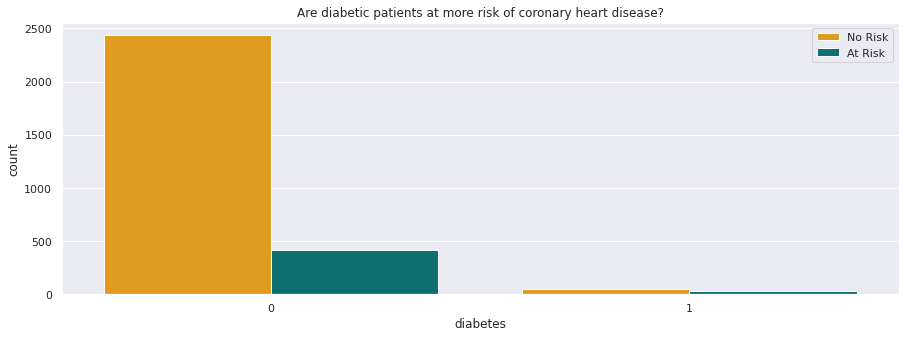

In [323]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,5))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are smokers at more risk of coronary heart disease ??**

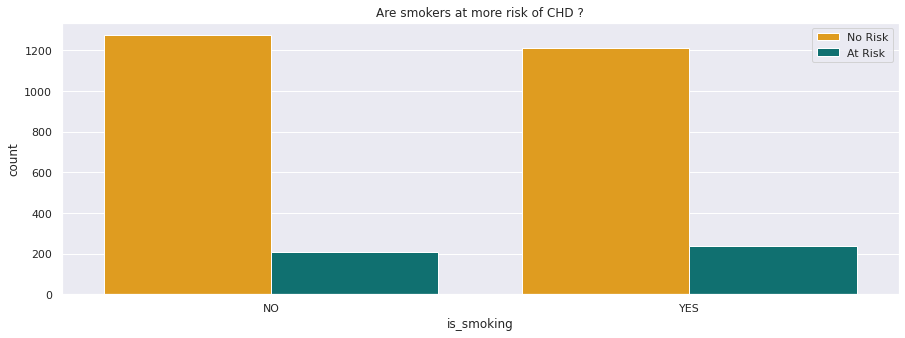

In [324]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,5))
sns.countplot(x = df['is_smoking'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are hypertensive patients at more risk of coronary heart disease ??**

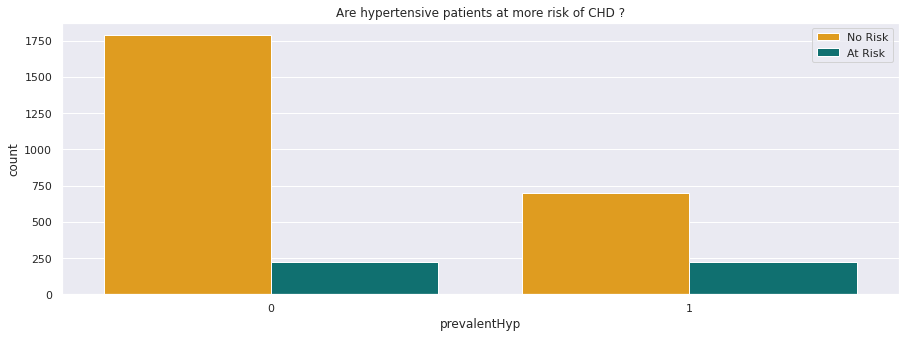

In [325]:
plt.figure(figsize = (15,5))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

Are patients with blood pressure on medication at more risk of coronary heart disease ??

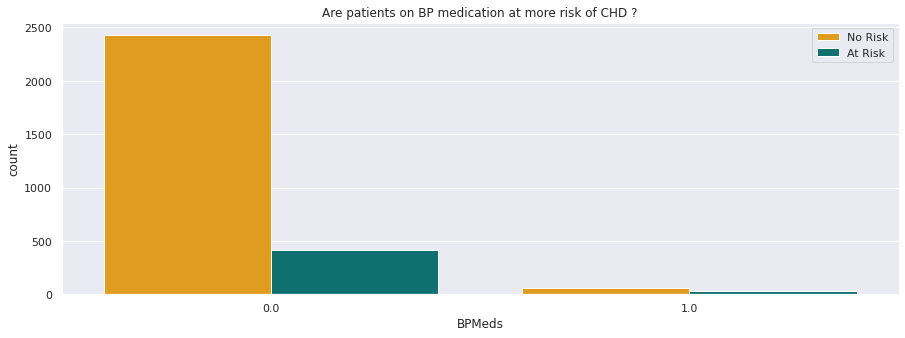

In [326]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,5))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Is Heart rate is responsible for CHD ??**

In [327]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [328]:
df['heartRateLabel'] = df.apply(heartRate_data, axis = 1)

In [329]:
df['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of 1       Normal
2       Normal
3       Normal
4       Normal
5       Normal
         ...  
3384      High
3385    Normal
3386    Normal
3387    Normal
3389    Normal
Name: heartRateLabel, Length: 2927, dtype: object>

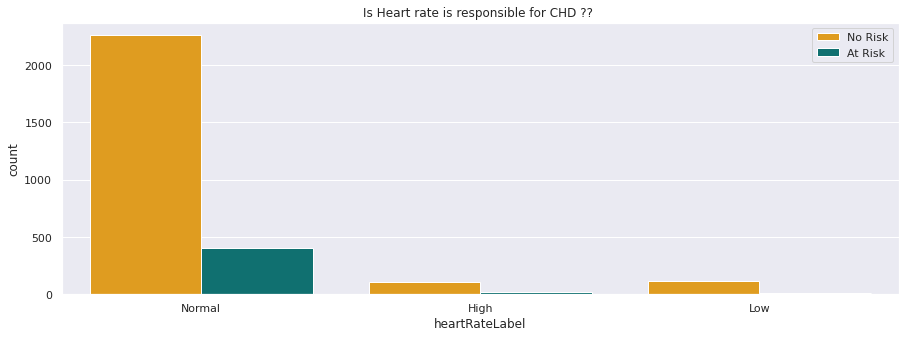

In [330]:
plt.figure(figsize = (15,5))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['heartRateLabel'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

In [331]:
df.drop(columns=['heartRateLabel'], inplace=True)

**how much smoking affect CHD?**

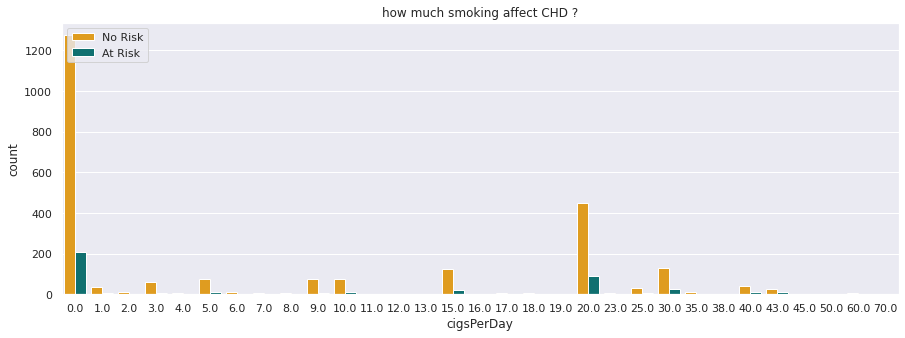

In [332]:
plt.figure(figsize = (15,5))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['cigsPerDay'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("how much smoking affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Whether a person who had a stroke earlier more prone to CHD?**

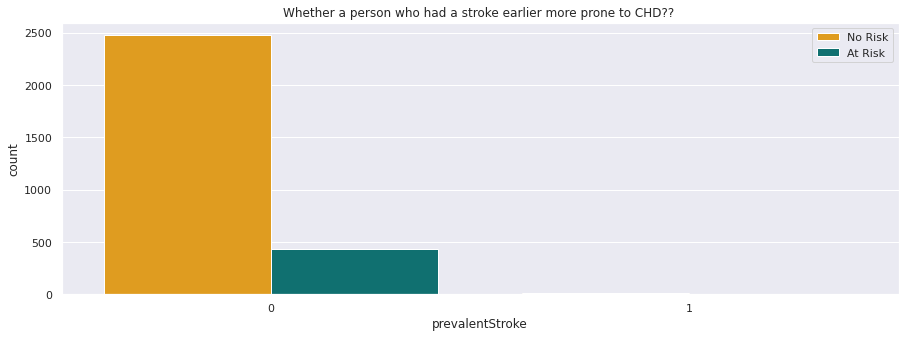

In [333]:
plt.figure(figsize = (15,5))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

Here, we are plotting the graph for the dependent variable along with the categorical variables present in the dataset.
We can conclude from here that,

(1) The people whoever already under the HyperTension, are at more risk of CVR

(2) But its not the same in case of people who were under the attack of stroke once before. The people who never got the stroke are at high risk of CVR.

(3) Whether people smoke or not smoke, they are at risk of CVR.

(4) Its shocking to see that the people who never got any medication barely comes under the risk of CVR. The people who are under BP medications are at high risk of CVR.

(5) When we compare males and females, males are at more risk of CVR.

(6) We can clearly see that, the people who had only basic education i.e., education 1 are at more risk of CVR. And its gradually decreasing with increase in education. It might be because that the people wo are educated are taking much precaustions to avoid CVR.

**B)- BIVARIATE ANALYSIS**

**Which Age group is more vulnerable to coronary heart disease ?**

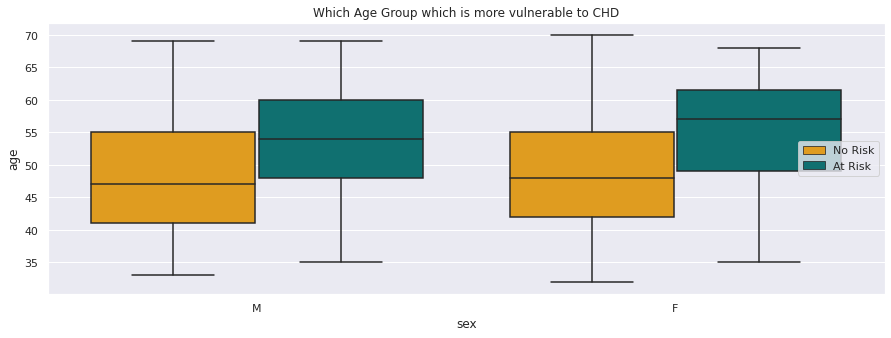

In [334]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

**Are Total Cholestrol levels related to coronary heart disease ??**

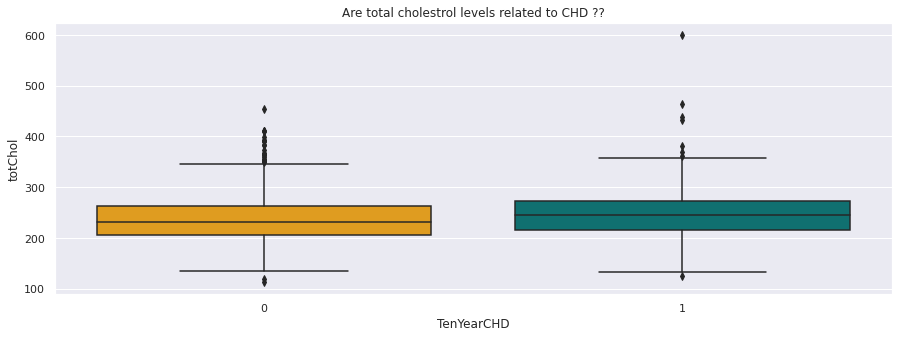

In [335]:
plt.figure(figsize = (15,5))
sns.boxplot(df['TenYearCHD'], df['totChol'], palette = my_palette)
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

**Are patients with systolic BP at risk of CHD?**

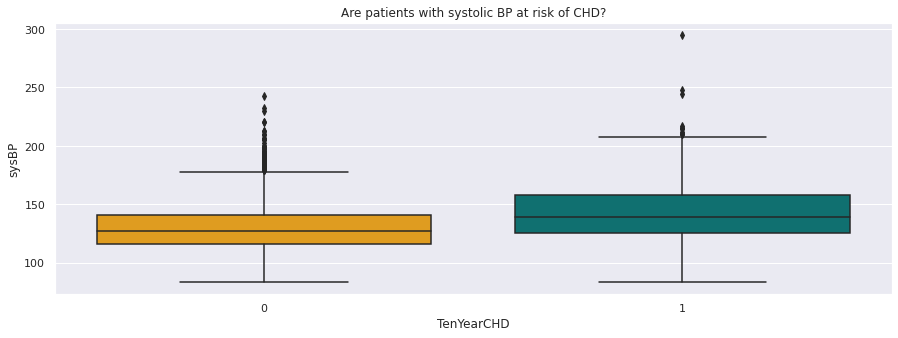

In [336]:
plt.figure(figsize = (15,5))
sns.boxplot(df['TenYearCHD'], df['sysBP'], palette = my_palette)
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

**Are patients with Diastolic BP at risk of CHD?**

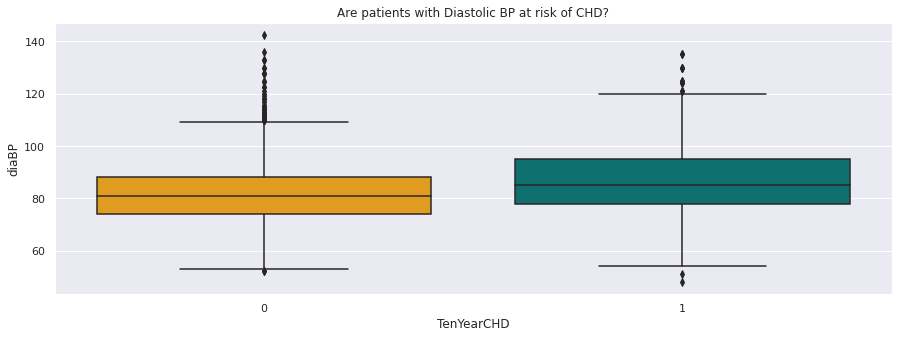

In [337]:
plt.figure(figsize = (15,5))
sns.boxplot(df['TenYearCHD'], df['diaBP'], palette = my_palette)
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

Over the years, research has found that both numbers are equally important in monitoring heart health. However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.

In [338]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

   TenYearCHD  
1           0  
2           0  
3           1  
4           0  
5           1

**Is patients BMI important to show the risk of CHD?**

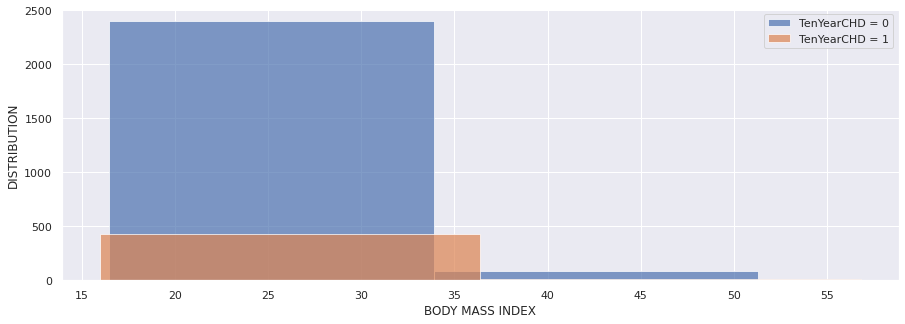

In [339]:
plt.figure(figsize=(15,5))

plt.hist(df['BMI'][df['TenYearCHD'] == 0], bins=2, alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(df['BMI'][df['TenYearCHD'] == 1], bins=2, alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('BODY MASS INDEX')
plt.legend()

**Can patients Glucose levels show the risk of CHD?**

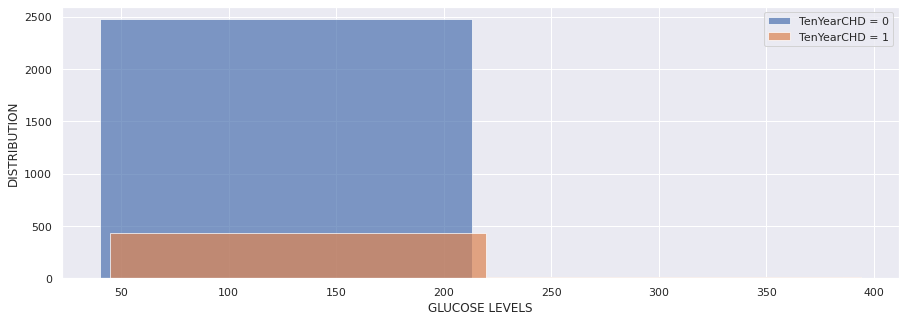

In [340]:
plt.figure(figsize=(15,5))

plt.hist(df['glucose'][df['TenYearCHD'] == 0], bins=2, alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(df['glucose'][df['TenYearCHD'] == 1], bins=2, alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('GLUCOSE LEVELS')
plt.legend()

**C)-MULTIVARIATR ANALYSIS**

 we are trying to get some conclusions about some numerical columns. So we tried plotting the same along with CVR and few more important variables whichever is useful to to come to conclusion.

**Age and CVR with other numerical columns**

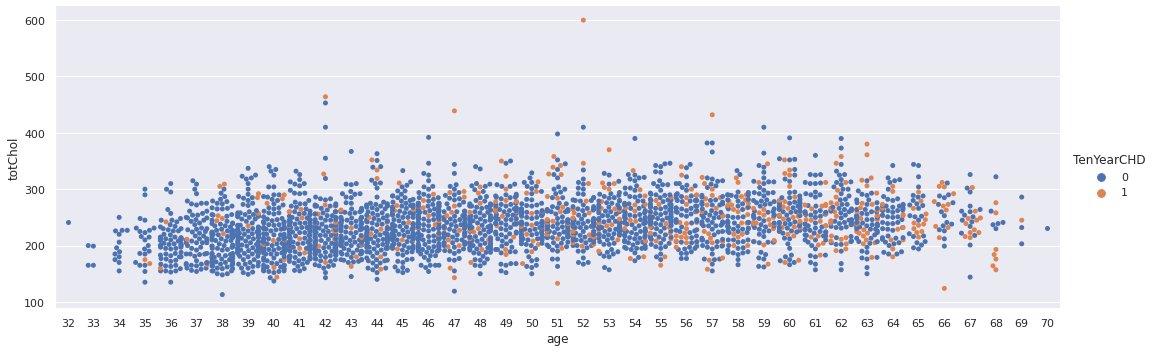

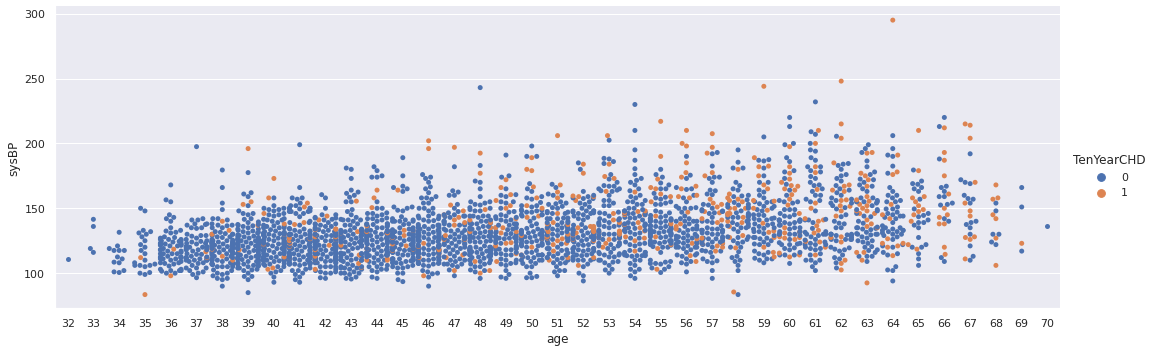

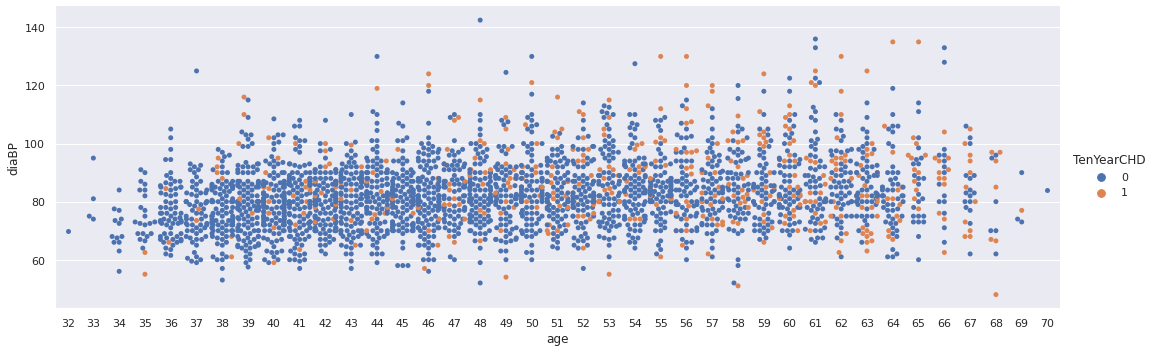

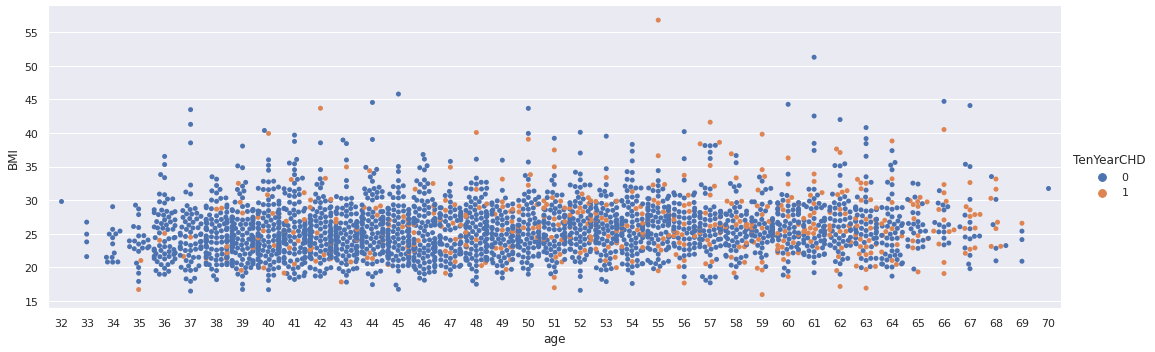

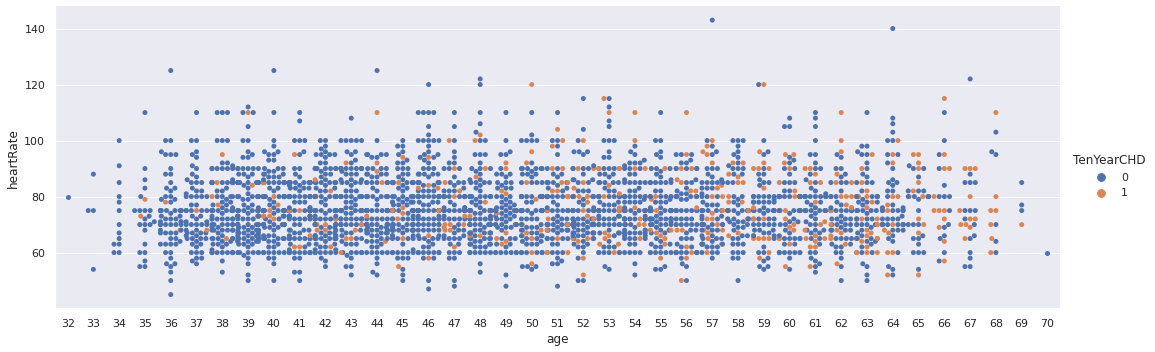

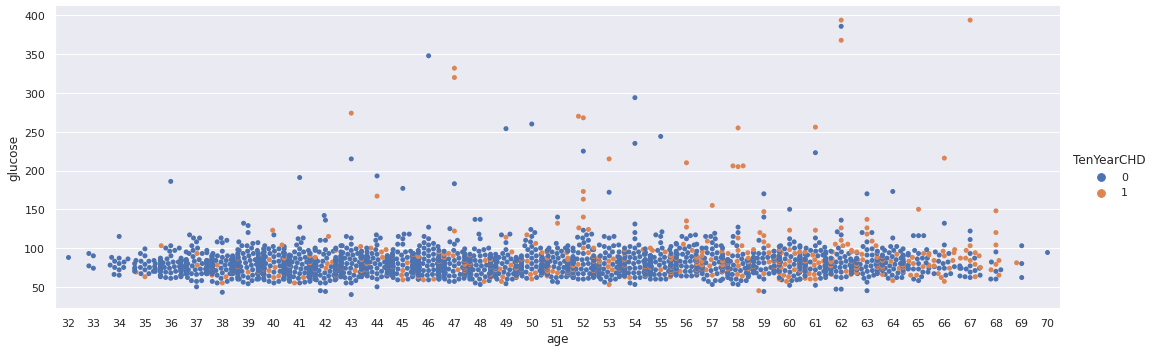

In [341]:
for i in numerical_columns:
  if i!='age':
    sns.catplot(x="age", y=i, hue="TenYearCHD", kind="swarm", data=df,height=5, aspect=3)

Here we can observe that,
(1) The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. We can see same level of measures such as BP, BMI etc., for all age group.

(2) The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. And at the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.

(3) If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR.

**Diabetes and CVR with other numerical columns**

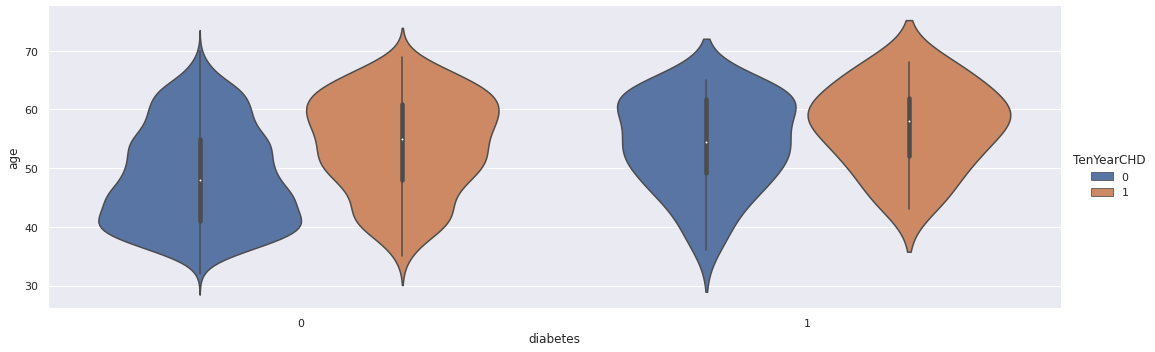

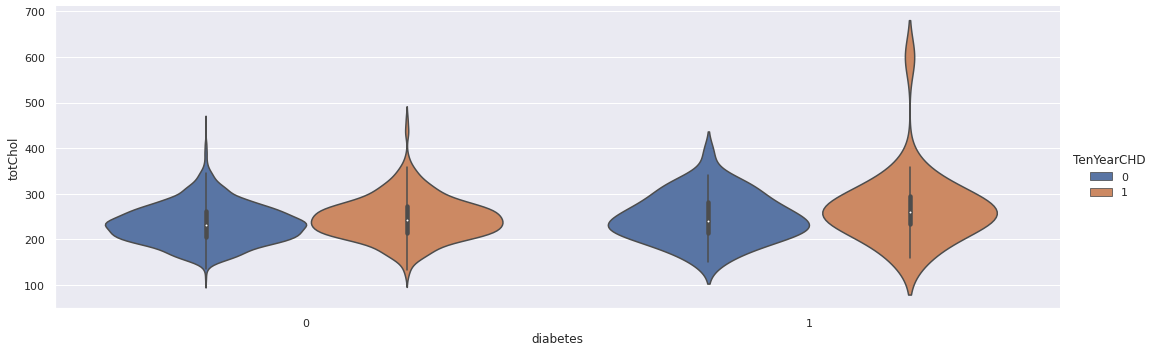

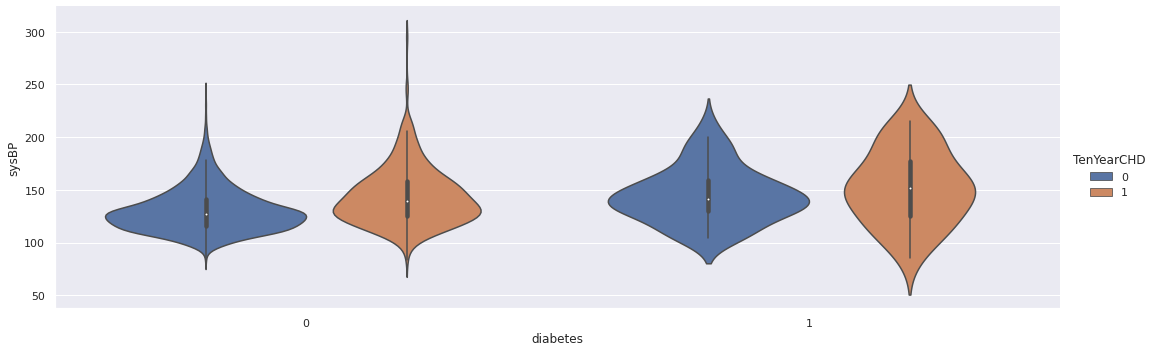

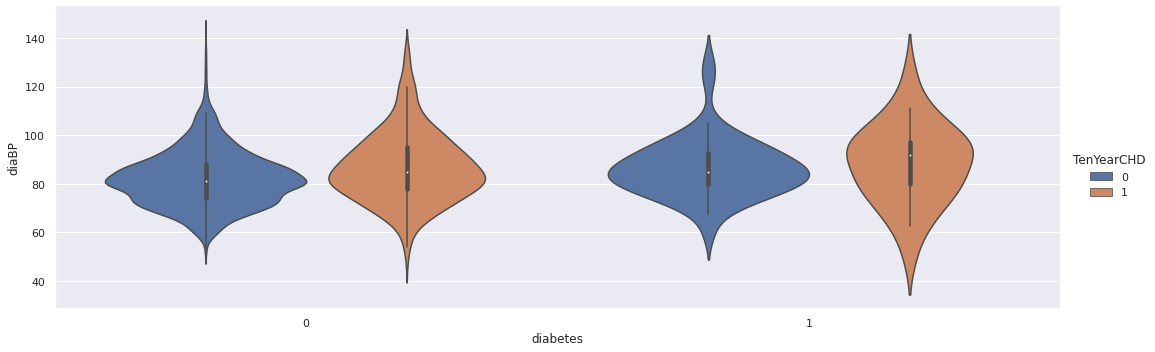

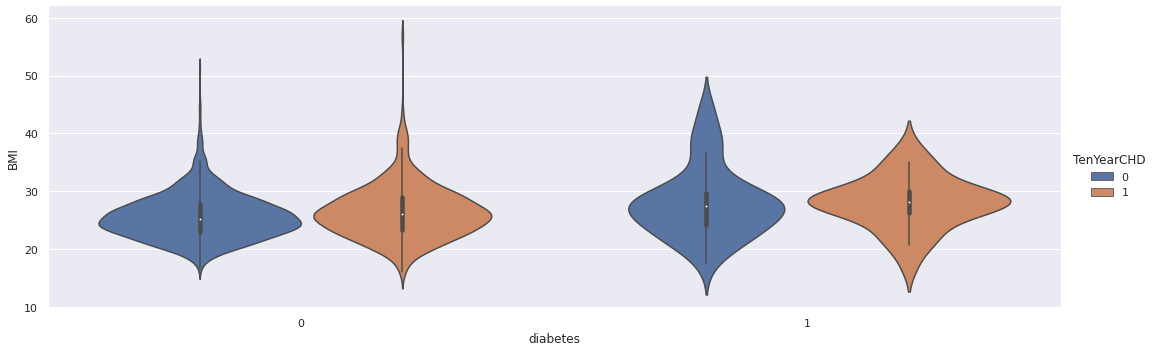

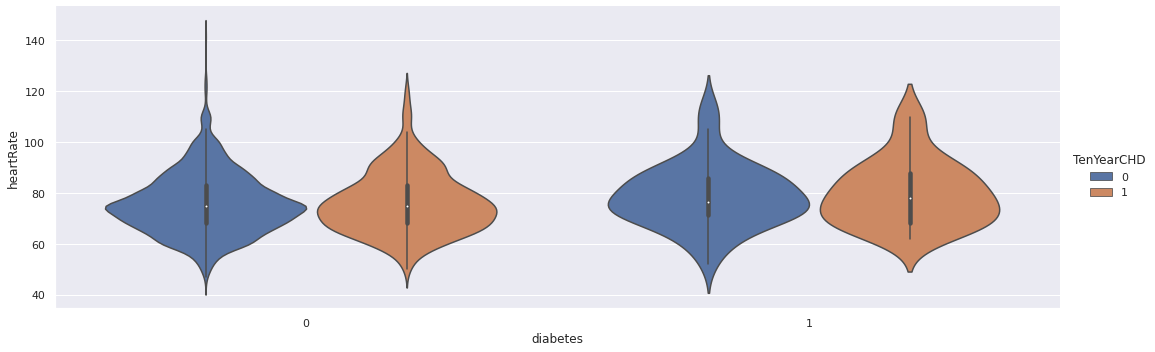

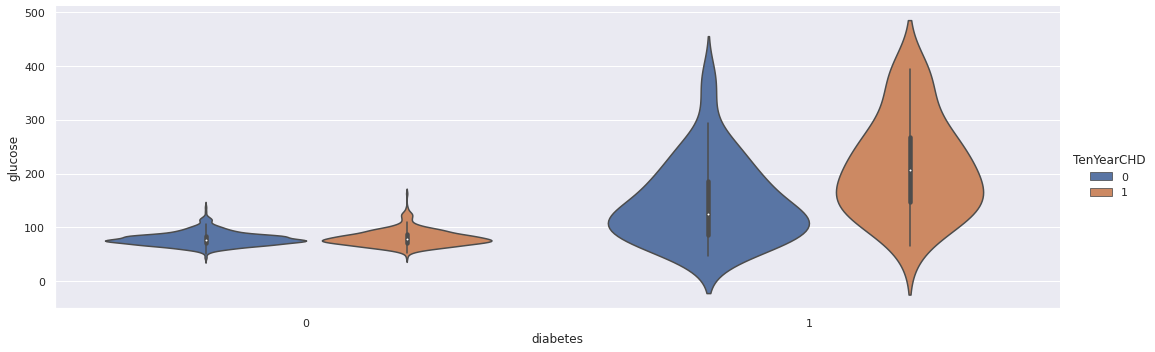

In [342]:
for i in numerical_columns:
  sns.catplot(x="diabetes", y=i, hue="TenYearCHD", kind="violin", data=df,height=5, aspect=3)


Here, we can observe that,
(1) Even though they had diabetes or not, they are at same level of risk of CVR. But its high between the age group 50-70.

(2) We say that cholestrol and diabetes are related, but from the data, its contrary to our assumption. Even though many people have very high level of high cholestrol, they were not at risk of diabetes nor CVR. But if people had diabetes and cholestrol levels are high then they are at high risk of CVR.

(3) BP and heartrate has nothing to do th the diabetes in here. Many people who are at risk of CVR and diabetes are actually maintaining a normal range of BP and heart rate.

(4) If people are already having diabetes and if they have high BMI then they are at high risk of CVR.

# Standardization - Min Max Scaler 

**Distribution plot of all numerical variables**

Text(0.5, 0, 'Numerical variables')

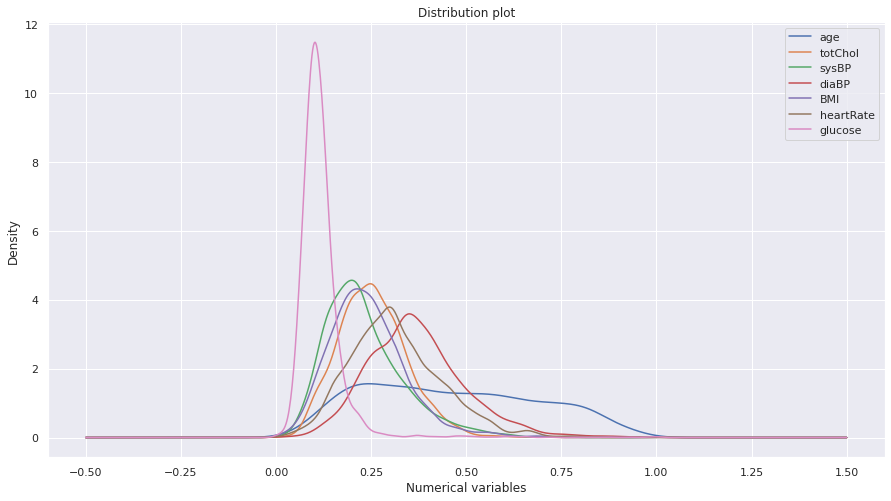

In [343]:
#Min max scaler
column_names = numerical_columns
# column_names
#taking columns to do the minmaxscaling
cardio_2 = pd.DataFrame()
#using standardization as both numeric columns are in different scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numerical_columns])
#print(scaled)
cardio_2 = pd.DataFrame(scaler.fit_transform(df[numerical_columns]))
cardio_2.columns = column_names

sns.set(rc = {'figure.figsize':(15,8)})
cardio_2.plot.kde()
plt.title("Distribution plot")
plt.xlabel("Numerical variables")

We can observe that there are many people with high level of glucose followed by cholestrol. It might be that the lifestyle of people are contributing more to these values. So we observe some peaks in these vlaues.

# Transformation

Data transformation includes data cleaning techniques and a data reduction technique to convert the data into the appropriate form. Data transformation is an essential data preprocessing technique that must be performed on the data before data mining to provide patterns that are easier to understand.

In [344]:
# Applying transformation and looking the graph before and after transformation

import scipy.stats as stats
import pylab

def to_plot(DF,column):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(DF[column])
  plt.subplot(1,2,2)
  stats.probplot(DF[column],dist='norm',plot=pylab)
  plt.show()

def log_transform(DF,column):
  print("Before Transformation")
  to_plot(DF,column)
  # applying log transformation
  DF[column]=np.log1p(DF[column])
  #plotting
  print("After Transformation")
  to_plot(DF,column)
  # stats.probplot()

def box_cox_transform(DF,column):
  print("Before Transformation")
  to_plot(DF,column)
  # applying boxcox transformation
  DF[column],parameters=stats.boxcox(DF[column])
  print("After Transformation")
  to_plot(DF,column)
numerical_columns = ['age', 'totChol', 'BMI', 'heartRate', 'glucose']
#updating as we deleted sysBP and diaBP

In [345]:
numerical_columns = ['age', 'totChol', 'BMI', 'heartRate', 'glucose']
#updating as we deleted sysBP and diaBP

Before Transformation


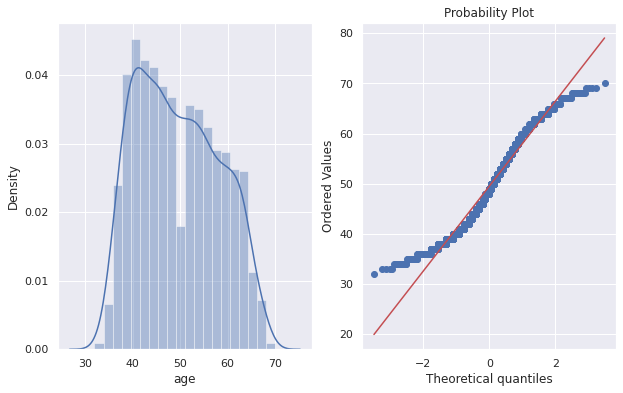

After Transformation


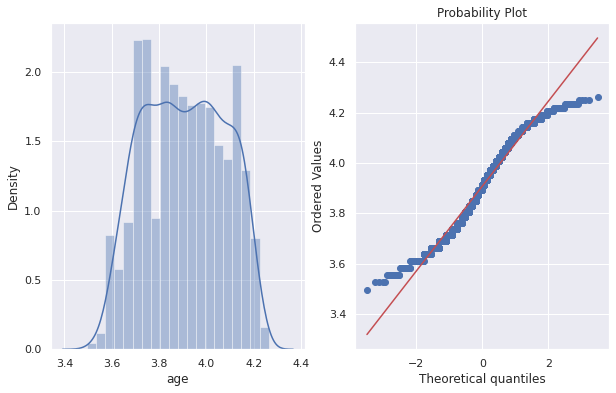

Before Transformation


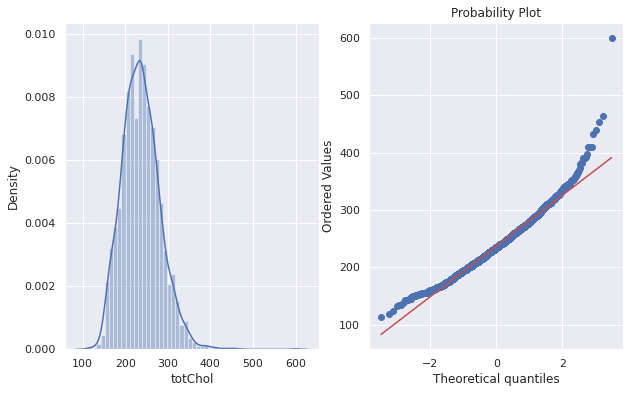

After Transformation


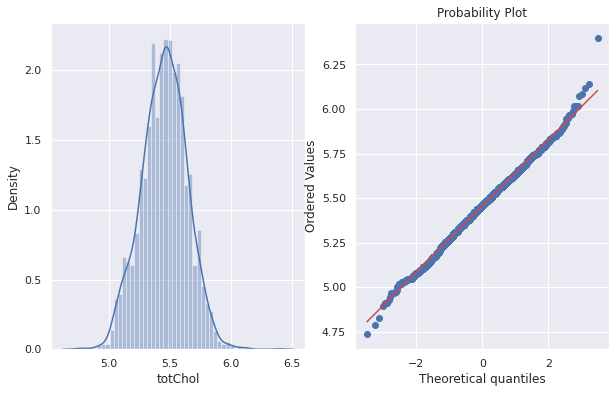

Before Transformation


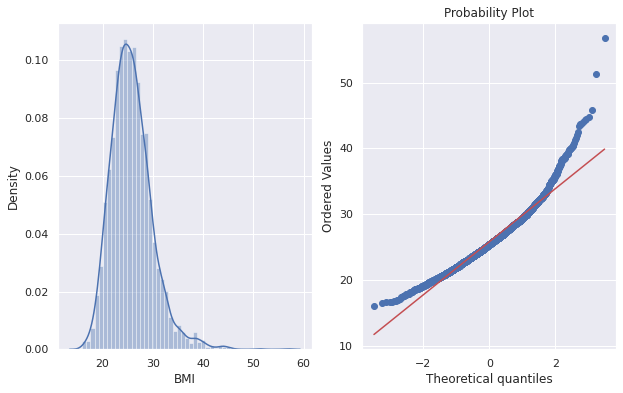

After Transformation


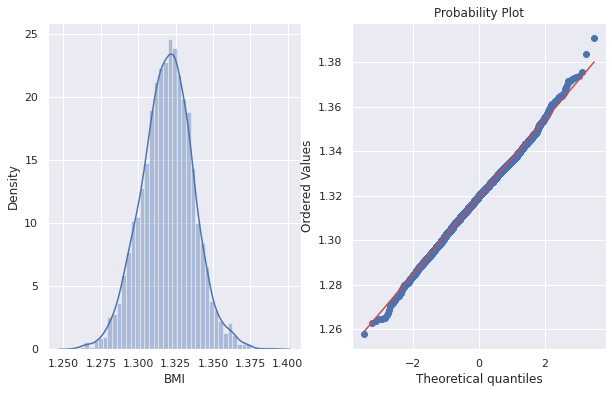

Before Transformation


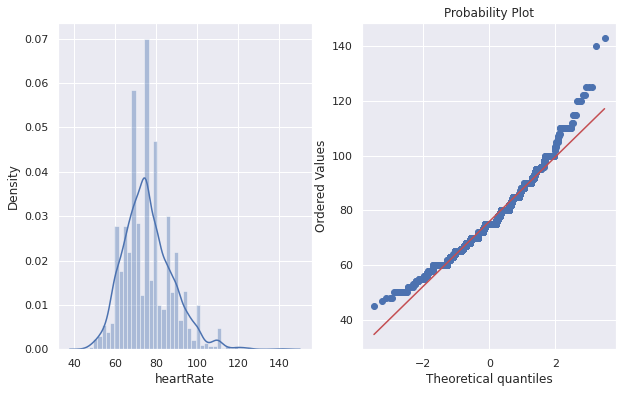

After Transformation


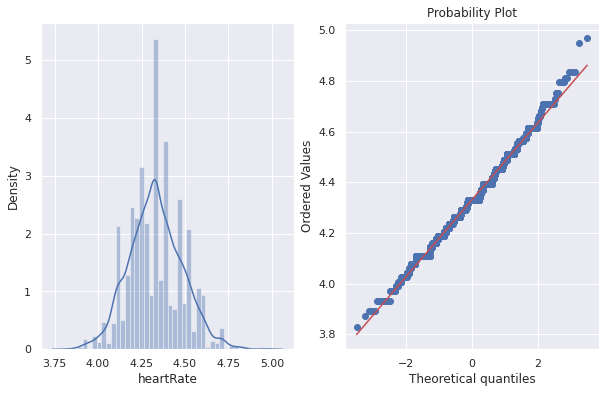

Before Transformation


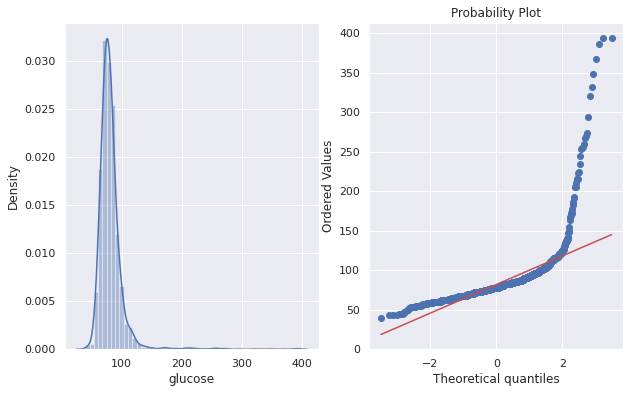

After Transformation


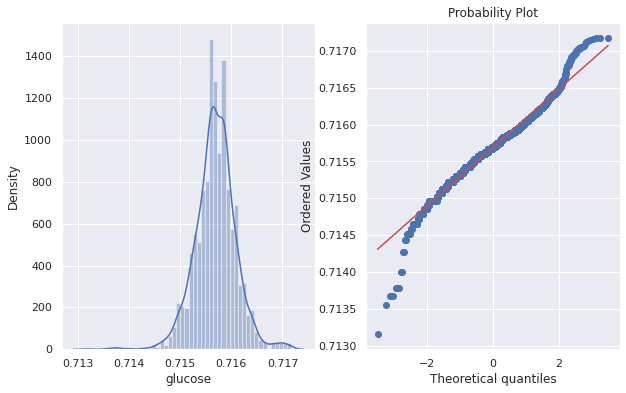

In [346]:
#Applying the transformaation to only numerical columns
log_transform(df,'age')
log_transform(df,'totChol')
box_cox_transform(df,'BMI')
log_transform(df,'heartRate')
box_cox_transform(df,'glucose')

Transformation is not a must thing to do in classification models. but taking a normal distribution variables always improve the performance of the model. So now, we are done with the transformatin, we will use the one-hot encoding to categorical variables.

#**Feature engineering**

Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.

In [347]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [348]:
df['Hypertension'] = df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df.head()

id       age  education sex is_smoking  cigsPerDay  BPMeds  \
1   1  3.610918        4.0   M         NO         0.0     0.0   
2   2  3.850148        1.0   F        YES        10.0     0.0   
3   3  3.931826        1.0   M        YES        20.0     0.0   
4   4  4.174387        1.0   F        YES        30.0     0.0   
5   5  4.127134        3.0   F         NO         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol  sysBP  diaBP       BMI  \
1                0             1         0  5.361292  168.0   98.0  1.337051   
2                0             0         0  5.525453  116.0   71.0  1.292627   
3                0             1         0  5.455321  158.0   88.0  1.331621   
4                0             0         0  5.488938  136.5   85.0  1.324311   
5                0             1         0  5.609472  182.0  121.0  1.346670   

   heartRate   glucose  TenYearCHD  Hypertension  
1   4.290459  0.715601           0             5  
2   4.488636  0.716073           0             1  
3   4.234107  0.716073           1             3  
4   4.262680  0.715664           0             2  
5   4.454347  0.715216           1             7

Blood glucose levels can be used to classify the severity of Diabetes.

In [349]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [350]:
df['Diabetes'] = df['glucose'].apply(lambda x: diabetes_grade(x))
df.head()

id       age  education sex is_smoking  cigsPerDay  BPMeds  \
1   1  3.610918        4.0   M         NO         0.0     0.0   
2   2  3.850148        1.0   F        YES        10.0     0.0   
3   3  3.931826        1.0   M        YES        20.0     0.0   
4   4  4.174387        1.0   F        YES        30.0     0.0   
5   5  4.127134        3.0   F         NO         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol  sysBP  diaBP       BMI  \
1                0             1         0  5.361292  168.0   98.0  1.337051   
2                0             0         0  5.525453  116.0   71.0  1.292627   
3                0             1         0  5.455321  158.0   88.0  1.331621   
4                0             0         0  5.488938  136.5   85.0  1.324311   
5                0             1         0  5.609472  182.0  121.0  1.346670   

   heartRate   glucose  TenYearCHD  Hypertension  Diabetes  
1   4.290459  0.715601           0             5         1  
2   4.488636  0.716073           0             1         1  
3   4.234107  0.716073           1             3         1  
4   4.262680  0.715664           0             2         1  
5   4.454347  0.715216           1             7         1

The absolute number of cigarettes per day is not much useful variable because the stiffness of blood vessels increases as the number of cigarettes consumed per day increases. So new feature containing log-transformed value could be more useful.

In [351]:
df['SmokingFactor'] = df['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))
df.head()

id       age  education sex is_smoking  cigsPerDay  BPMeds  \
1   1  3.610918        4.0   M         NO         0.0     0.0   
2   2  3.850148        1.0   F        YES        10.0     0.0   
3   3  3.931826        1.0   M        YES        20.0     0.0   
4   4  4.174387        1.0   F        YES        30.0     0.0   
5   5  4.127134        3.0   F         NO         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol  sysBP  diaBP       BMI  \
1                0             1         0  5.361292  168.0   98.0  1.337051   
2                0             0         0  5.525453  116.0   71.0  1.292627   
3                0             1         0  5.455321  158.0   88.0  1.331621   
4                0             0         0  5.488938  136.5   85.0  1.324311   
5                0             1         0  5.609472  182.0  121.0  1.346670   

   heartRate   glucose  TenYearCHD  Hypertension  Diabetes  SmokingFactor  
1   4.290459  0.715601           0             5         1       0.000000  
2   4.488636  0.716073           0             1         1       2.302585  
3   4.234107  0.716073           1             3         1       2.995732  
4   4.262680  0.715664           0             2         1       3.401197  
5   4.454347  0.715216           1             7         1       0.000000

In [352]:
df['cigsPerDay'].value_counts()

0.0     1480
20.0     538
30.0     158
15.0     147
10.0      88
5.0       87
9.0       81
3.0       68
40.0      53
1.0       44
43.0      38
25.0      37
2.0       15
35.0      14
6.0       13
8.0        8
7.0        8
60.0       6
18.0       6
4.0        6
17.0       5
23.0       5
50.0       4
11.0       4
13.0       3
12.0       3
45.0       2
16.0       2
19.0       2
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [353]:
# remove not useful columns
df.drop(columns=['id', 'prevalentHyp', 'sysBP', 'diaBP', 'diabetes', 'is_smoking', 'cigsPerDay'], inplace=True)

# Checing Multicollinearity

Multicollinearity should be checked till we build models to make sure that we are not adding any variables with high correlation.

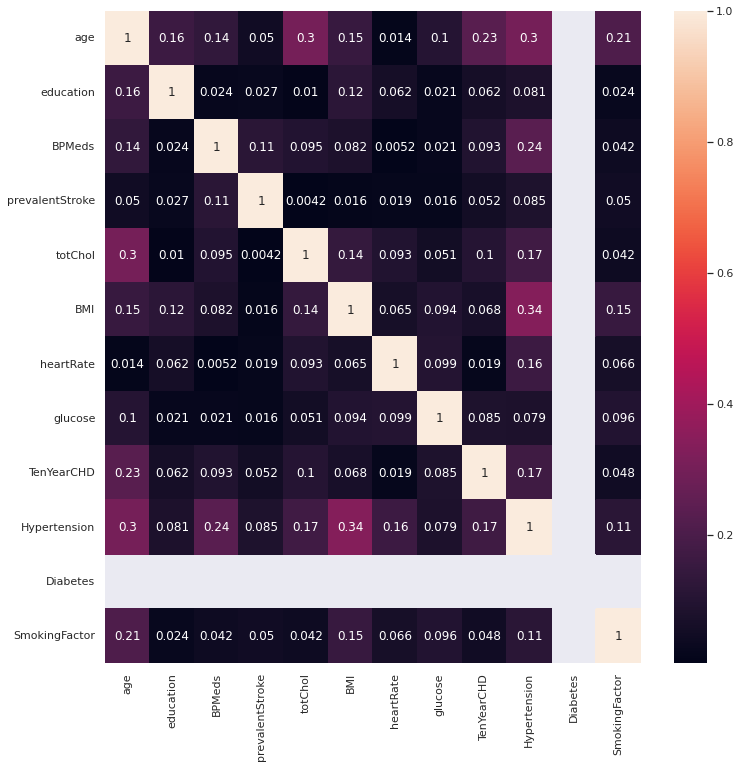

In [354]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(12,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)

**Distribution of all numerical variables by plotting histogram**

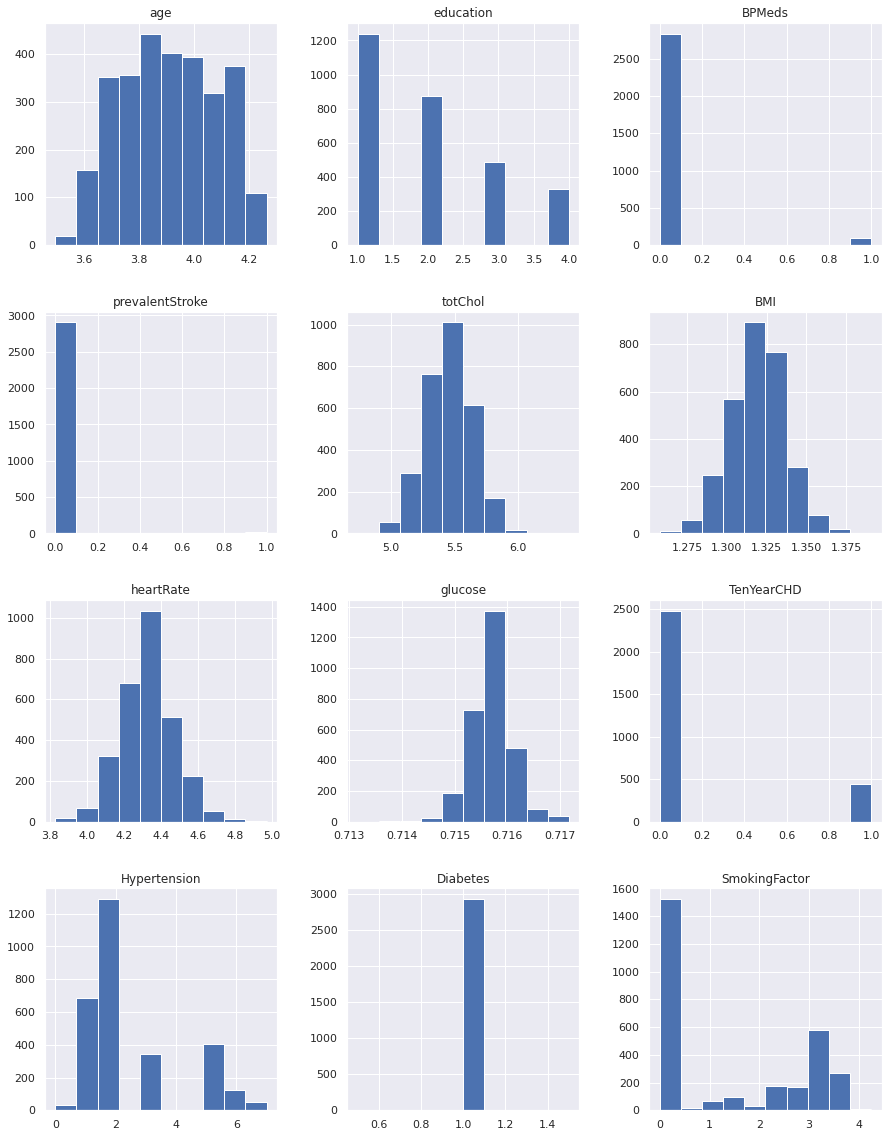

In [355]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [356]:
# remove not useful columns
df.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2927 non-null   float64
 1   education      2927 non-null   float64
 2   sex            2927 non-null   object 
 3   totChol        2927 non-null   float64
 4   BMI            2927 non-null   float64
 5   heartRate      2927 non-null   float64
 6   glucose        2927 non-null   float64
 7   TenYearCHD     2927 non-null   int64  
 8   Hypertension   2927 non-null   int64  
 9   Diabetes       2927 non-null   int64  
 10  SmokingFactor  2927 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 338.9+ KB


**Converting categorical data to numeric data for model training.**

In [358]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)

In [359]:
df.head()

age  education  sex   totChol       BMI  heartRate   glucose  \
1  3.610918        4.0    1  5.361292  1.337051   4.290459  0.715601   
2  3.850148        1.0    0  5.525453  1.292627   4.488636  0.716073   
3  3.931826        1.0    1  5.455321  1.331621   4.234107  0.716073   
4  4.174387        1.0    0  5.488938  1.324311   4.262680  0.715664   
5  4.127134        3.0    0  5.609472  1.346670   4.454347  0.715216   

   TenYearCHD  Hypertension  Diabetes  SmokingFactor  
1           0             5         1       0.000000  
2           0             1         1       2.302585  
3           1             3         1       2.995732  
4           0             2         1       3.401197  
5           1             7         1       0.000000

# **Train Test Split**

**Defining Dependent variable and Independent variable**

In [360]:
dependent_variable = 'TenYearCHD'
independent_variable = list(df.columns)
independent_variable.remove(dependent_variable)
print(independent_variable)

['age', 'education', 'sex', 'totChol', 'BMI', 'heartRate', 'glucose', 'Hypertension', 'Diabetes', 'SmokingFactor']


In [361]:
X = df[independent_variable].values
y = df[dependent_variable].values

**Treat Class imbalance by SMOTE or MSMOTE**

Let's Resample the dataset to over come this imbalance. We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [362]:
# Balancing the data using SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

#using class_wieghts

class_weight = {0: 1,
                1: 6}

{0: 2483, 1: 444} {0: 2482, 1: 1986}


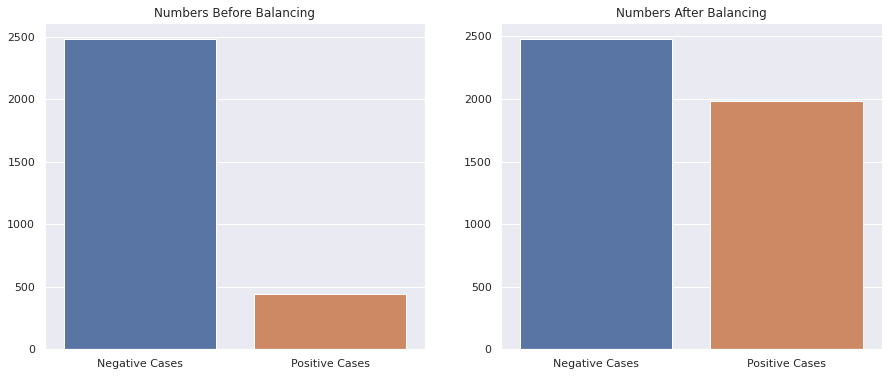

In [363]:
# Plotting a bargraph checking balanced data

labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [364]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

In [365]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#**Building All Models**

#1) K Nearest Neighbours

In [366]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test)

In [367]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.96782317 0.89843313 0.89927252 0.84918858 0.85002798
 0.82036933 0.82204813 0.79826525 0.79770565]
Test Accuracy:  [0.8310962  0.82102908 0.78411633 0.77740492 0.75615213 0.74384787
 0.72259508 0.72595078 0.71812081 0.72706935]


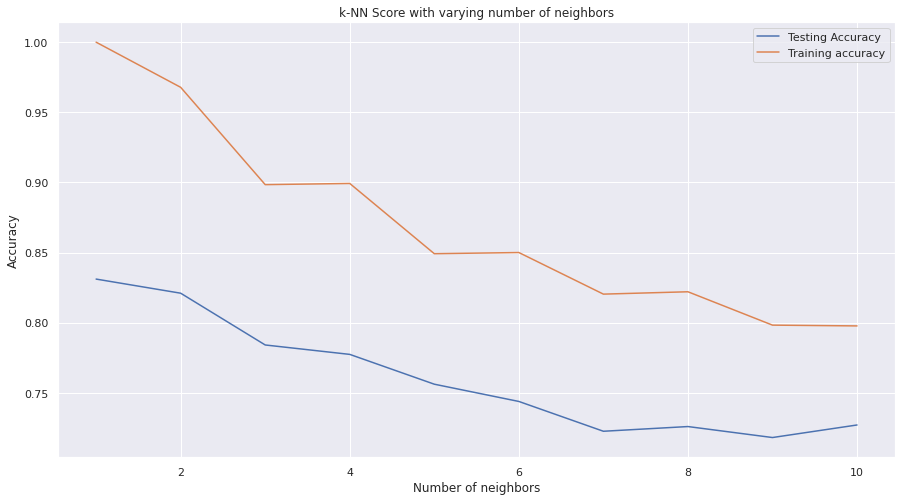

In [368]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Webcan see that test score is increasing as number of neighbours increases.

**Hyper parameter tuning - KNN**

Let's try to find best parameter for knn.

In [369]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [370]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [371]:
knn_cv.best_score_

0.8080597833539009

In [372]:
knn_cv.best_params_

{'n_neighbors': 1}

In [373]:
# predictions
knn_predict = knn_cv.predict(X_test)

In [374]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       498
           1       0.74      0.94      0.83       396

    accuracy                           0.83       894
   macro avg       0.84      0.84      0.83       894
weighted avg       0.85      0.83      0.83       894



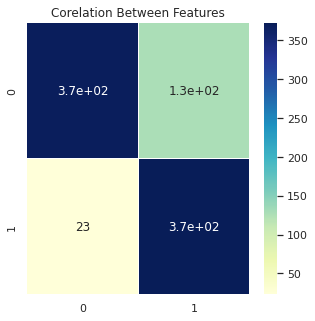

In [375]:
conf_mat = confusion_matrix(y_test, knn_predict)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

# Logistic Regression

In [376]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [377]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 0.67391673, -0.08512705,  0.19390806,  0.17596746,  0.00455753,
        -0.04801848,  0.20765728,  0.24795232,  0.        ,  0.30218547]])

In [378]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [379]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6703973139339675
The accuracy on test data is  0.6431767337807607


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

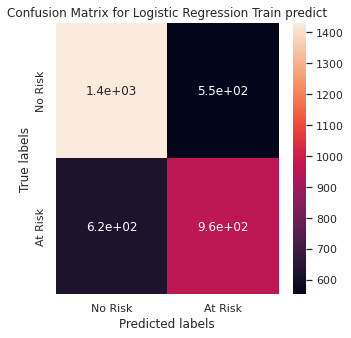

In [380]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[357 141]
 [178 218]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

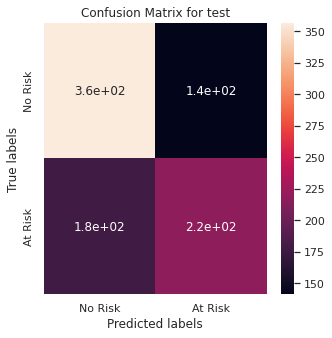

In [381]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [382]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [383]:
grid={"C":np.logspace(-5,8,15), "penalty":["l1","l2"]}
logreg = LogisticRegression()

In [384]:
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

In [385]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'penalty': 'l2'}
Best score is 0.6720670391061454


In [386]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6336862601922844
Accuracy score: 0.6431767337807607
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1984
           1       0.64      0.61      0.62      1590

    accuracy                           0.67      3574
   macro avg       0.67      0.66      0.66      3574
weighted avg       0.67      0.67      0.67      3574



              precision    recall  f1-score   support

           0       0.67      0.72      0.69       498
           1       0.61      0.55      0.58       396

    accuracy                           0.64       894
   macro avg       0.64      0.63      0.63       894
weighted avg       0.64      0.64      0.64       894



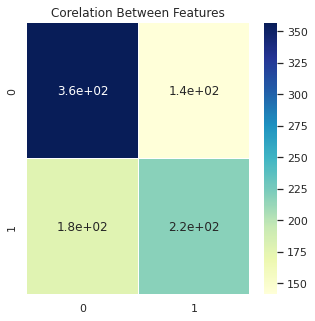

In [387]:
conf_mat = confusion_matrix(y_test, test_preds)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

# Building Desicion Tree Model

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [388]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

Predicting on test cell and train cell

In [389]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [390]:

#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 74.83221476510067
the training accuracy is 78.735310576385


[Text(0.4714285714285714, 0.9722222222222222, 'X[0] <= -0.283\nentropy = 0.991\nsamples = 3574\nvalue = [1984, 1590]'),
 Text(0.22857142857142856, 0.9166666666666666, 'X[0] <= -1.357\nentropy = 0.804\nsamples = 1427\nvalue = [1077, 350]'),
 Text(0.11428571428571428, 0.8611111111111112, 'X[9] <= 0.92\nentropy = 0.521\nsamples = 453\nvalue = [400, 53]'),
 Text(0.05714285714285714, 0.8055555555555556, 'X[3] <= 0.103\nentropy = 0.286\nsamples = 280\nvalue = [266, 14]'),
 Text(0.02857142857142857, 0.75, 'entropy = 0.127\nsamples = 228\nvalue = [224, 4]'),
 Text(0.08571428571428572, 0.75, 'X[6] <= -0.27\nentropy = 0.706\nsamples = 52\nvalue = [42, 10]'),
 Text(0.05714285714285714, 0.6944444444444444, 'entropy = 0.94\nsamples = 28\nvalue = [18, 10]'),
 Text(0.11428571428571428, 0.6944444444444444, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.17142857142857143, 0.8055555555555556, 'X[5] <= -0.681\nentropy = 0.77\nsamples = 173\nvalue = [134, 39]'),
 Text(0.14285714285714285, 0.75, 

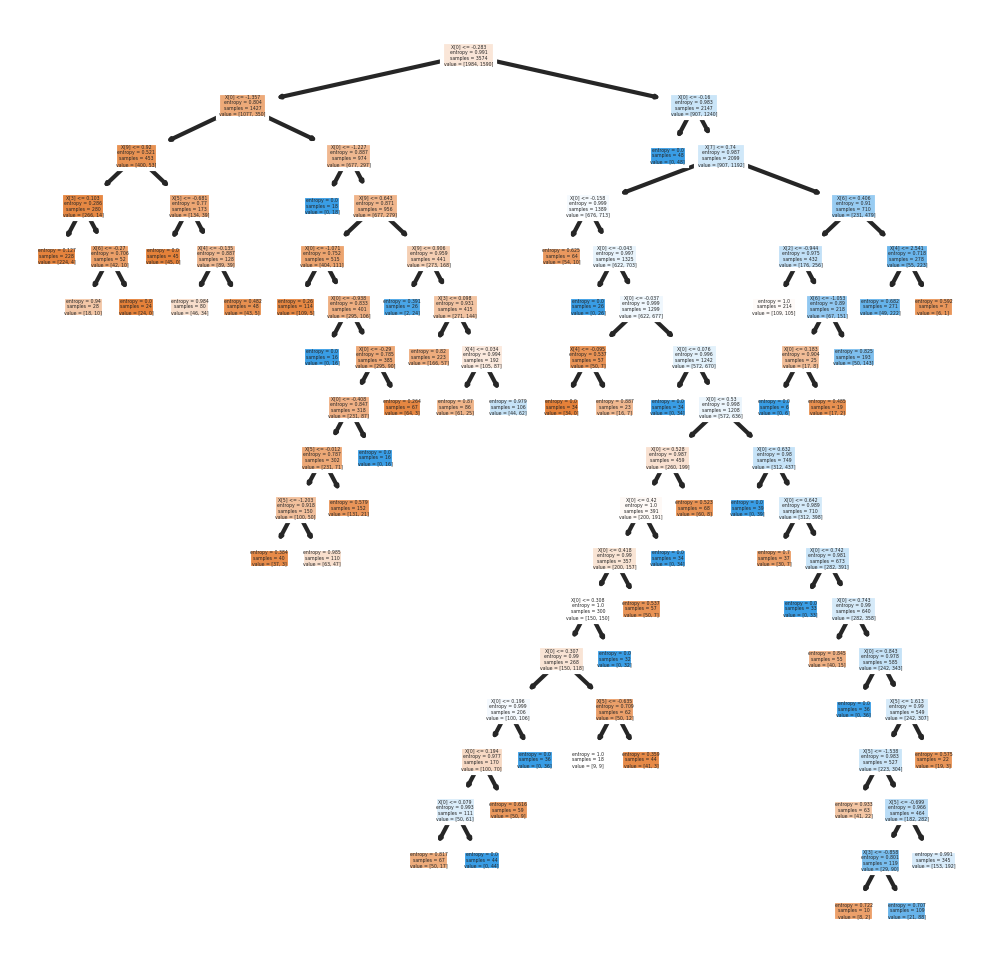

In [391]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

[[1665  319]
 [ 441 1149]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

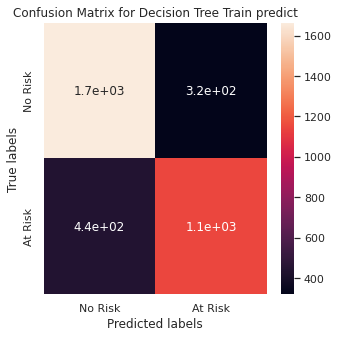

In [392]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[397 101]
 [124 272]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

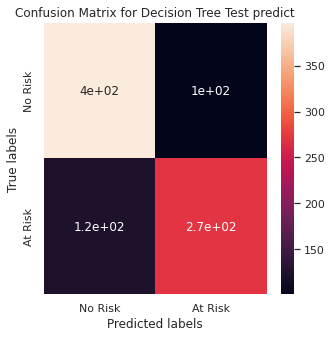

In [393]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [394]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1984
           1       0.78      0.72      0.75      1590

    accuracy                           0.79      3574
   macro avg       0.79      0.78      0.78      3574
weighted avg       0.79      0.79      0.79      3574



In [395]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       498
           1       0.73      0.69      0.71       396

    accuracy                           0.75       894
   macro avg       0.75      0.74      0.74       894
weighted avg       0.75      0.75      0.75       894



**Hyperparameter tunning - Decision tree**

In [396]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid 
param_dist = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating GridSearchCV object
tree_cv = GridSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best score is 0.7216031027795734


In [397]:
tree_pred = tree_cv.predict(X_test)
print(classification_report(y_test,tree_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7313    0.7269    0.7291       498
           1     0.6591    0.6641    0.6616       396

    accuracy                         0.6991       894
   macro avg     0.6952    0.6955    0.6954       894
weighted avg     0.6993    0.6991    0.6992       894



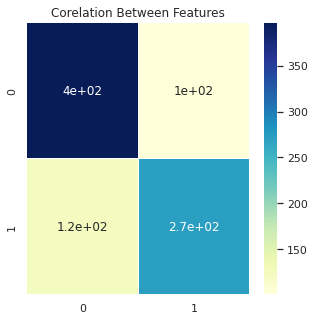

In [398]:
conf_mat = confusion_matrix(y_test, test_preds)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

## Building Ensembles of Decision Tree

In [399]:
# Buliding random classifier model
classifier = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')

In [400]:
# Fitting the model
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [401]:
# checking train and test data
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [402]:
# checking accuracy score of train data
accuracy_score(y_train,train_preds)

0.996082820369334

In [403]:
# checking accuracy score of test data
accuracy_score(y_test,test_preds)

0.8154362416107382

In [404]:
# checking ROC-AUC score of test data
roc_auc_score(y_test,test_preds)

0.8123554825362055

In [405]:
# checking ROC-AUC score of train data
roc_auc_score(y_train,train_preds)

0.9961595277946845

[[1975    9]
 [   5 1585]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

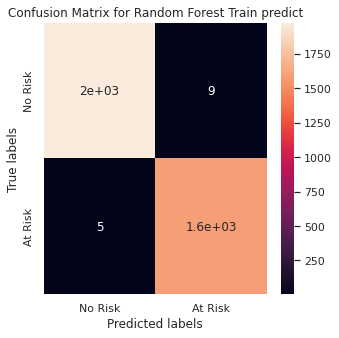

In [406]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[418  80]
 [ 85 311]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

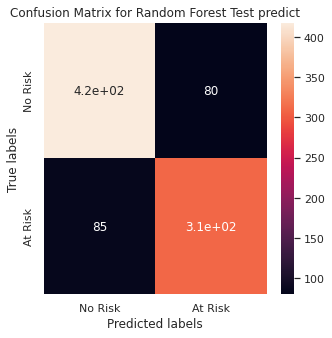

In [407]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [408]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1984
           1       0.99      1.00      1.00      1590

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



In [409]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       498
           1       0.80      0.79      0.79       396

    accuracy                           0.82       894
   macro avg       0.81      0.81      0.81       894
weighted avg       0.82      0.82      0.82       894



**Hyperparameter tunning - Random forest classifier**

In [410]:
# Random forest with hyperparameter tunning using GridsearchCV

from sklearn.model_selection import GridSearchCV

param_grid_rf = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]}
grid=GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose=1)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [411]:
# Checking classification report
grid_pred = grid.predict(X_test)
print(classification_report(y_test,grid_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8027    0.8494    0.8254       498
           1     0.7956    0.7374    0.7654       396

    accuracy                         0.7998       894
   macro avg     0.7991    0.7934    0.7954       894
weighted avg     0.7995    0.7998    0.7988       894



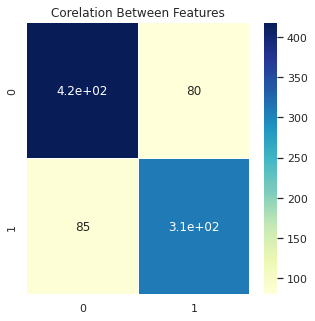

In [412]:
# Plotting confusion matrix

conf_mat = confusion_matrix(y_test, test_preds)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [413]:
# hyperparameter Tunning
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_lgr = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid_lgr, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.6720765509000802


In [414]:
logreg_pred = logreg_cv.predict(X_test)
print(classification_report(y_test,logreg_pred,digits=4))

              precision    recall  f1-score   support

           0     0.6660    0.7169    0.6905       498
           1     0.6061    0.5480    0.5756       396

    accuracy                         0.6421       894
   macro avg     0.6361    0.6324    0.6331       894
weighted avg     0.6395    0.6421    0.6396       894



# Gradient Boost Classifier

In [415]:
# Gradient Boost Classifier
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [416]:
# Hyperparameter tunning with Gradient boosting
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [417]:
# fitting the model
gradientBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [418]:
# checking values
train_preds =  gradientBC.predict(X_train)
test_preds  = gradientBC.predict(X_test)

In [419]:
# checking accuracy score
accuracy_score(y_train,train_preds)

0.8458310016787912

In [420]:
# checking accuracy score
accuracy_score(y_test,test_preds)

0.7953020134228188

In [421]:
# roc-auc score
roc_auc_score(y_test,test_preds)

0.7916970913958865

In [422]:
#roc-auc score
roc_auc_score(y_train,train_preds)

0.8425916768107121

[[1730  254]
 [ 297 1293]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

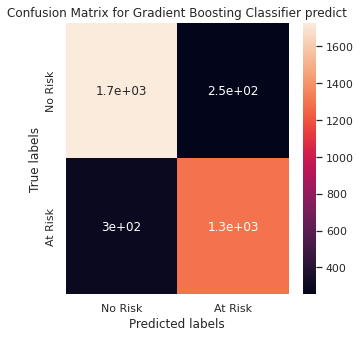

In [423]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[410  88]
 [ 95 301]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

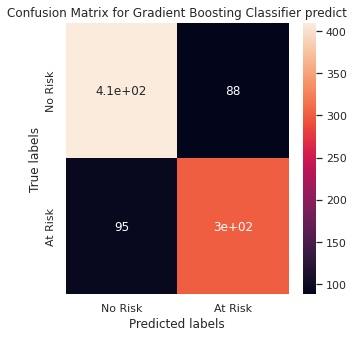

In [424]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Text(0.5, 1.0, 'Roc Auc Curve for Gradient Boosting Classifier')

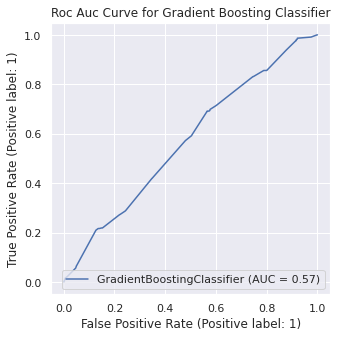

In [425]:
plot_roc_curve(gradientBC,X,y)
plt.title("Roc Auc Curve for Gradient Boosting Classifier")

classification report of train and test

In [426]:
# classification report of train and test

print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       498
           1       0.77      0.76      0.77       396

    accuracy                           0.80       894
   macro avg       0.79      0.79      0.79       894
weighted avg       0.80      0.80      0.80       894



              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1984
           1       0.84      0.81      0.82      1590

    accuracy                           0.85      3574
   macro avg       0.84      0.84      0.84      3574
weighted avg       0.85      0.85      0.85      3574



# XGboost Classifier

In [427]:
#using XGBoost
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [428]:
xg_cla.fit(X_test,y_test)

XGBClassifier(alpha=10, colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              n_estimators=10)

In [429]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [430]:
accuracy_score(y_train,train_preds)

0.7176832680470061

In [431]:
accuracy_score(y_test,test_preds)

0.9440715883668904

In [432]:
roc_auc_score(y_test,test_preds)

0.9399720092491176

In [433]:
roc_auc_score(y_train,train_preds)

0.7070596216271049

[[1594  390]
 [ 619  971]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

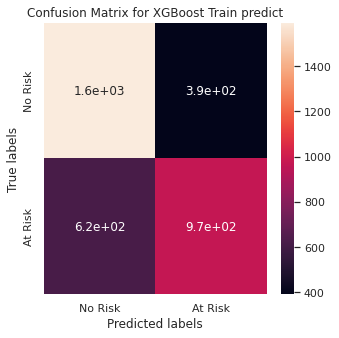

In [434]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[486  12]
 [ 38 358]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

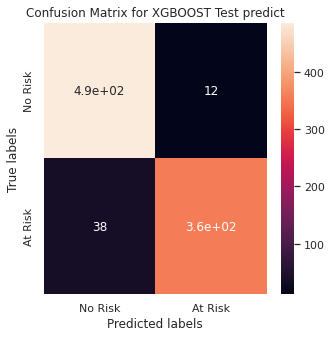

In [435]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [436]:
print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       498
           1       0.97      0.90      0.93       396

    accuracy                           0.94       894
   macro avg       0.95      0.94      0.94       894
weighted avg       0.95      0.94      0.94       894



              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1984
           1       0.71      0.61      0.66      1590

    accuracy                           0.72      3574
   macro avg       0.72      0.71      0.71      3574
weighted avg       0.72      0.72      0.71      3574



# Visualising the tree

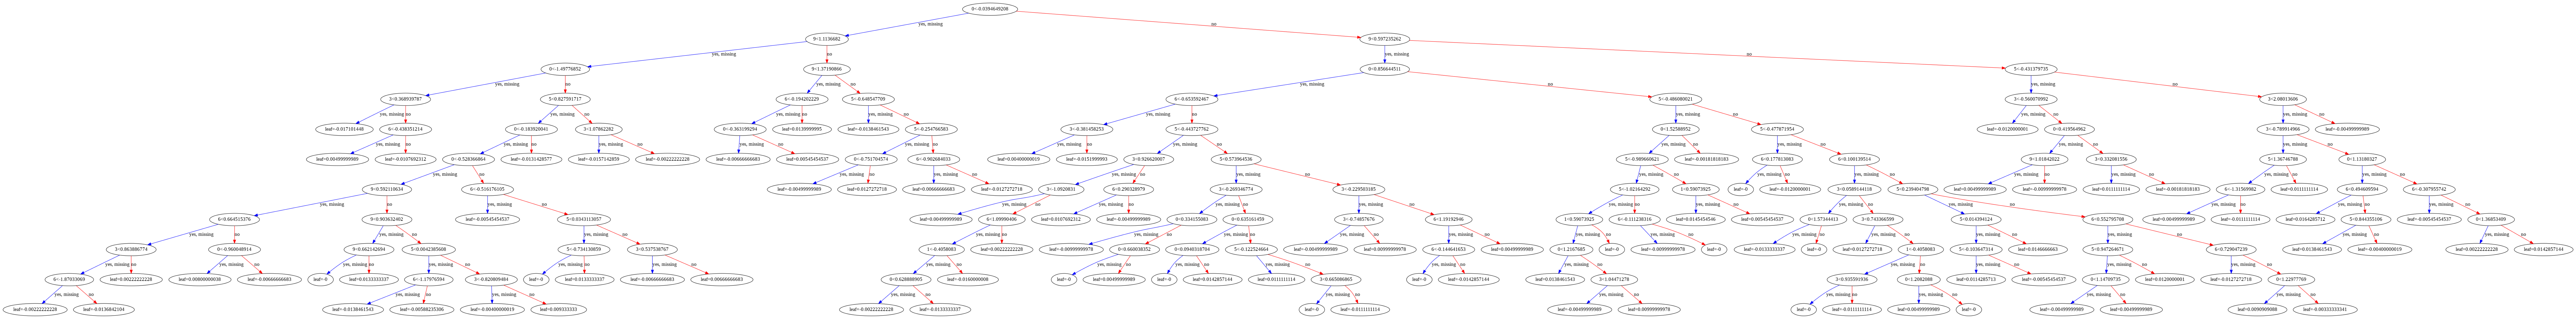

In [437]:
ax = xgb.plot_tree(xg_cla,num_trees=0)
ax.figure.set_size_inches(200, 100)
plt.show()

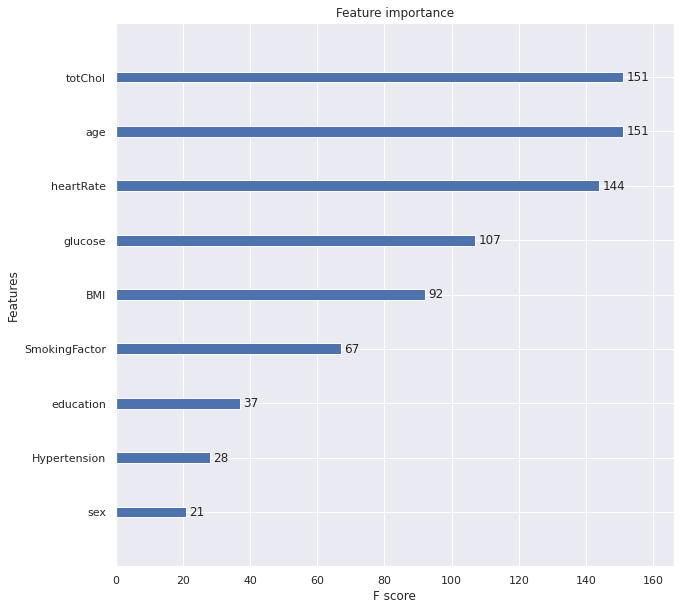

In [438]:
orig_feature_names = list(df.columns)
orig_feature_names.remove('TenYearCHD')
xg_cla.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10, 10)
plt.show()

# AdaBoost Classification

In [439]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.grid_search import GridSearchCV

param_grid_adb = {
    'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]
             }


#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

adb = AdaBoostClassifier()

# run grid search
adaboost_cv = GridSearchCV(adb, param_grid=param_grid_adb, cv = 5)
adaboost_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(adaboost_cv.best_params_))
print("Best score is {}".format(adaboost_cv.best_score_))

Tuned Decision Tree Parameters: {'learning_rate': 0.3, 'n_estimators': 500}
Best score is 0.7389477189477189


In [440]:
adb_pred = adaboost_cv.predict(X_test)
print(classification_report(y_test,adb_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7603    0.7771    0.7686       498
           1     0.7117    0.6919    0.7017       396

    accuracy                         0.7394       894
   macro avg     0.7360    0.7345    0.7351       894
weighted avg     0.7388    0.7394    0.7390       894



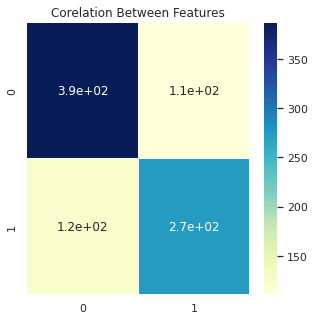

In [441]:
conf_mat = confusion_matrix(y_test, adb_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

# Naive Bayes Classifier

In [442]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [443]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
nb = GaussianNB()

gs_NB = GridSearchCV(estimator=nb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_test, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [444]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [445]:
gs_NB.best_score_

0.631615508547277

In [446]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.6364653243847874


In [447]:
print(classification_report(y_test,predict_test,digits=4))

              precision    recall  f1-score   support

           0     0.6605    0.7149    0.6866       498
           1     0.6000    0.5379    0.5672       396

    accuracy                         0.6365       894
   macro avg     0.6302    0.6264    0.6269       894
weighted avg     0.6337    0.6365    0.6337       894



# SVM

In [448]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)
 
# fitting the model for grid search
svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.573 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.575 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.575 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.639 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [449]:
svm_pred = svm_cv.predict(X_test)
print(classification_report(y_test,svm_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9055    0.8655    0.8850       498
           1     0.8397    0.8864    0.8624       396

    accuracy                         0.8747       894
   macro avg     0.8726    0.8759    0.8737       894
weighted avg     0.8763    0.8747    0.8750       894



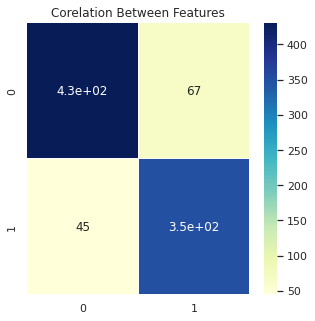

In [450]:
conf_mat = confusion_matrix(y_test, svm_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

# Before hyperparameter tunning

In [451]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [452]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)
lgr = LogisticRegression(solver='liblinear')
adb = AdaBoostClassifier(algorithm='SAMME.R',random_state=42)
nb = GaussianNB()
     

In [453]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "Adaboost" : adb,
          "Naive Bayes" : nb}
scores= { }

In [454]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [455]:
# after feature selection
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

Accuracy Score
Random forest              0.834452
Decision tree              0.757271
Adaboost                   0.722595
SVM                        0.676734
KNN                        0.659955
Logistic Regression        0.643177
Naive Bayes                0.634228

In [456]:
# An idea about total correct and wrong predictions
PN=[]
for key, value in models.items():
    model_data = {}
    model_data["Name"] = key
    value.fit(X_train, y_train)
    predicted = value.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    model_data['True_positive'] = conf_mat[0][0]
    model_data['False_positive'] = conf_mat[0][1]
    model_data['False_negative'] = conf_mat[1][0]
    model_data['True_negative']= conf_mat[1][1]
    model_data['Correct_prediction'] = model_data['True_positive'] + model_data['True_negative']
    model_data['Wrong_prediction'] = model_data['False_positive'] + model_data['False_negative']
    PN.append(model_data)
PN=pd.DataFrame(PN)
PN
     

Name  True_positive  False_positive  False_negative  \
0        Decision tree            395             103              99   
1        Random forest            429              69              87   
2                  KNN            338             160             144   
3                  SVM            364             134             155   
4  Logistic Regression            357             141             178   
5             Adaboost            373             125             123   
6          Naive Bayes            336             162             165   

   True_negative  Correct_prediction  Wrong_prediction  
0            297                 692               202  
1            309                 738               156  
2            252                 590               304  
3            241                 605               289  
4            218                 575               319  
5            273                 646               248  
6            231                 567               327

# ROC Curve After Huperparameter tunning

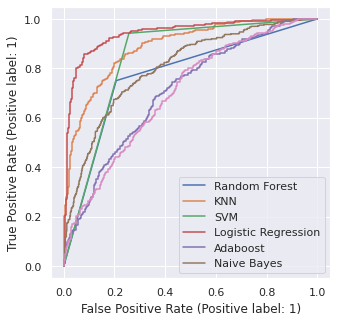

In [457]:
from sklearn.metrics import plot_roc_curve,classification_report

disp = plot_roc_curve(dtc, X_test, y_test)
plt.rcParams['figure.figsize'] = (10, 10)
plot_roc_curve(grid,X_test, y_test, ax = disp.ax_)
plot_roc_curve(knn_cv,X_test, y_test, ax = disp.ax_)
plot_roc_curve(svm_cv,X_test, y_test, ax = disp.ax_)
plot_roc_curve(logreg_cv,X_test, y_test, ax = disp.ax_)
plot_roc_curve(adaboost_cv,X_test, y_test, ax = disp.ax_)
plot_roc_curve(gs_NB,X_test, y_test, ax = disp.ax_) 
plt.legend(['Random Forest','KNN','SVM','Logistic Regression','Adaboost','Naive Bayes'])

**Evaluation Metric after hyper parameter tuning**

In [458]:
models = [['Adaboost', AdaBoostClassifier(random_state=42)],
          ['Adaboost after Hyperparameter Tuning',GridSearchCV(adb, param_grid=param_grid_adb, cv = 5)],
          ['Decision Tree', DecisionTreeClassifier()],
          ['Decision Tree after Hyperparameter Tuning',GridSearchCV(tree, param_dist, cv = 5)],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['KNN after Hyperparameter tuning ', KNeighborsClassifier(n_neighbors=5)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Logistic Regression after Hyperparameter Tuning',GridSearchCV(logreg, param_grid_lgr, cv = 5)],
          ['Naive Bayes', GaussianNB()],
          ['Naive Bayes after Hyperparameter tuning',
           GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1, 
                        scoring='accuracy')],
          ['Random Forest', RandomForestClassifier(n_estimators=90)],
          ['Random Forest after Hyperparameter Tuning',GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose=1)],
          ['SVM', SVC(random_state=6)],
          ['SVM after Hyperparameter Tuning',GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)]
          ]

In [459]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.573 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.575 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.575 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.5s
[

In [460]:
model_2_data = pd.DataFrame(model_1_data)
# model_1_data = model_1_data.sort_values('train_accuracy',ascending=False)
model_2_data

Name  Train_accuracy  \
0                                          Adaboost        0.739508   
1              Adaboost after Hyperparameter Tuning        0.764689   
2                                     Decision Tree        1.000000   
3         Decision Tree after Hyperparameter Tuning        0.907387   
4                                               KNN        0.688025   
5                  KNN after Hyperparameter tuning         0.849189   
6                               Logistic Regression        0.670397   
7   Logistic Regression after Hyperparameter Tuning        0.671237   
8                                       Naive Bayes        0.663402   
9           Naive Bayes after Hyperparameter tuning        0.663682   
10                                    Random Forest        1.000000   
11        Random Forest after Hyperparameter Tuning        0.975378   
12                                              SVM        0.745383   
13                  SVM after Hyperparameter Tuning        0.998321   

    Test_accuracy  Precision    Recall  F1_Score  
0        0.722595   0.748996  0.752016  0.750503  
1        0.739374   0.777108  0.760314  0.768620  
2        0.769575   0.793173  0.793173  0.793173  
3        0.713647   0.730924  0.748971  0.739837  
4        0.659955   0.678715  0.701245  0.689796  
5        0.756152   0.656627  0.874332  0.750000  
6        0.643177   0.716867  0.667290  0.691191  
7        0.642058   0.716867  0.666045  0.690522  
8        0.634228   0.674699  0.670659  0.672673  
9        0.634228   0.684739  0.667319  0.675917  
10       0.834452   0.867470  0.840467  0.853755  
11       0.806488   0.857430  0.807183  0.831548  
12       0.676734   0.730924  0.701349  0.715831  
13       0.874720   0.865462  0.905462  0.885010

In [461]:
classifiers = [GridSearchCV(adb, param_grid=param_grid_adb, cv = 5),GridSearchCV(tree, param_dist, cv = 5),
               KNeighborsClassifier(n_neighbors=5),GridSearchCV(logreg, param_grid_lgr, cv = 5),
               GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1, 
                        scoring='accuracy'),
               GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose=1),GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)]
classifiers_names = ['Adaboost','Decision tree','KNN','Logistic Regression','Naive Bayes','Random Forest','SVM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.573 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.575 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.575 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.5s
[

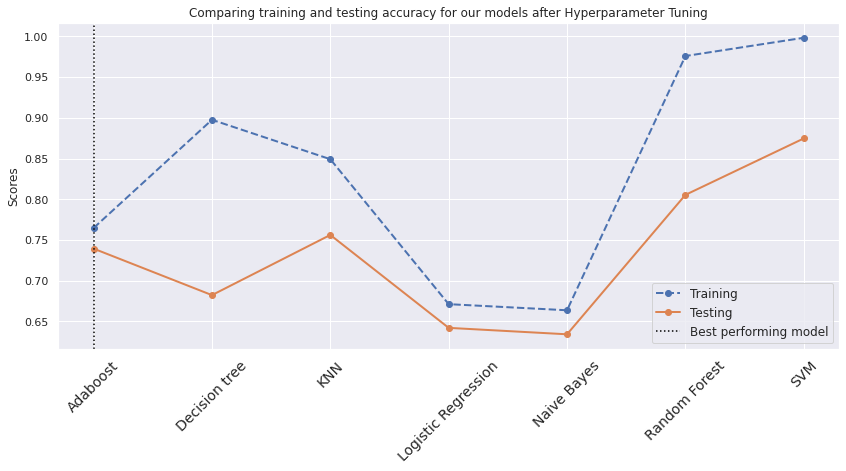

In [462]:
diff = np.array(training)-np.array(testing)

plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models after Hyperparameter Tuning")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

This is the graph after hyper parameter tuning. Even though the accuracy of some models were increased after hyper parameter tuning, still adaboost and naive bayes are the best performing models.

Between those if we compare Naive bayes and Adaboost with the accuracy and recall, Naive Bayes is the best performance model.

# Conclusions

There are many classification models available in supervised machine learning. The models which we have used are,

* Logistic regression : Logistic regression is a process of modeling the probability of a discrete outcome given an input variable.
* Decision Tree : A decision tree is a mechanical way to make a decision by dividing the inputs into smaller decisions. The tree is divided into decision nodes and leafs. It is based on the concept of entropy.
* Random Forest : Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision tree at training time.
* K – nearest neighbor : K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* Naïve Bayes classifiers : Naïve Bayes classifiers are a family of simple “probabilistic clasifiers”  based on applying Bayes theorem with strong independence assumptions between the features.
* Adaboost classifiers : An AdaBoost classifier is a meta-estimator that begins by fitting  a classifier on the original dataset and then fits additional copies of the classifier on the  same dataset but where the weights of incorrectly classified instances are adjusted such  that subsequent classifiers focus more on difficult cases.
* Support Vector Machine (SVM) : “Support Vector Machine” (SVM) is a  supervised machine learning algorithm that can be used for both classification or  regression challenges. Here we plot each data item as a point in n-dimensional space  with the value of each feature being the value of a particular coordinate. Then, we  perform classification by finding the hyper-plane that differentiates the two classes very  well.

# Classifications Evalualation Matrixs 

Here we are getting a view of all scores of evaluation metric that is train and test accuracy, Precision, Recall and F1 score.
From here we can conclude that,

(1) precision is always more. Its because we have very few amount of class '1' in the dependent variable. So its hard for the model to learn from the data to predict the target variable as '1'. So we try not to consider the value of precision into consideration.

(2) If we have a look into f1 score, its the same in all the models except decision tree, so we can not consider this to evaluate our model performance in here.

(3) So lets just consider, accuracy and recall of these models for evaluation.

(4) First lets just consider recall, the more its near to 1, the more the performance of the model. We can see high recall in Adaboost, Naive Bayes and Random Forest models.

(5) If we now have a look of these 3 models train and test accuracy, then Random forest is overfitting.

(6) So from here, we can conclude that Naive Bayes and Adaboost is performing well.





We tried plotting all numerical variables with the dependent variables. From here we can conclude that,

* The major people who are having Cardiovascular Risk(CVR) are at the age of 50-70.
* The cholesterol level of people is the same for both kinds of people who are at risk of CVR and not at risk of CVR. Instead fewer people who are not at risk of CVR are having high Cholesterol levels.
* If we consider sysBP and diaBP together into consideration, then most of the people are having normal BP. So it's hard to conclude here about the CVR.
* Even though many people have a normal range of BMI, the people who are having high BMI, they are at risk of CVR.
* Many people are having normal heart rate ranges, so it's not appropriate to come into conclusion about the CVR at this stage.
* In glucose level, we can see some outliers in both kinds of people(who are at risk and not at risk). But the people who have high glucose levels are coming into the category of CVR. 
* So we can conclude that it's even one of the factors which may contribute to CVR.


We are plotting the graph for the dependent variable along with the categorical variables present in the dataset. We can conclude from here that,

* The people whoever already under the HyperTension, are at more risk of CVR
But it's not the same in case of people who were under the attack of stroke once before. 
* The people who never got the stroke are at high risk of CVR.
Whether people smoke or not smoke, they are at risk of CVR.
* It's shocking to see that the people who never got any medication barely come under the risk of CVR. The people who are under BP medications are at high risk of CVR.
* When we compare males and females, males are at more risk of CVR.
* We can clearly see that, the people who had only basic education i.e., education 1 are at more risk of CVR. And it's gradually decreasing with the increase in education. It might be because the people who are educated are taking many precautions to avoid CVR.

We observe dependent variables with some of the features by doing bivariate and multivariate analysis.

* Even if they had diabetes or not, they are at the same level of risk of CVR. But it's high between the age group 50-70.
* We say that cholesterol and diabetes are related, but from the data, it's contrary to our assumption. 
* Even though many people have very high levels of high cholesterol, they were not at risk of diabetes nor CVR. But if people have diabetes and cholesterol levels are high then they are at high risk of CVR.
* BP and heart rate have nothing to do with diabetes here. Many people who are at risk of CVR and diabetes are actually maintaining a normal range of BP and heart rate.
* If people are already having diabetes and if they have high BMI then they are at high risk of CVR.
